Let's study the possibility of extraction of CFFs from simulated data, and in particular how to get reliable error bands, using the so-called closure tests, along the lines and ideas introduced by NNPDF collaboration.

# Initializations

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We work with `torch` gepard branch!

In [3]:
import gepard as g
import gepard.plots as gplots
from gepard.fits import GLO15new, AUTIpts, ALUIpts
print('Gepard version = {}'.format(g.__version__))

Gepard version = 0.9.11b0


In [4]:
import torch
import numpy as np

In [5]:
import matplotlib
import matplotlib.pyplot as plt

`torch` branch works only with Neural models, but we want to generate simulated
data with KM and GK models. So we take `master` Gepard branch, rename
`gepard -> gmaster` in 3 places in `setup.py` and `setup.cfg`, and by
`pip install -e .` we install 
official Gepard package under the alternative name `gmaster`.

In [6]:
import gmaster as gm  # need KM15 for simulated data
from gmaster.fits import par_KM15

In [7]:
angle = np.pi/4  # simplification instead of harmonics

In [8]:
## Where stuff to be included in LaTeX goes
PAPER_DIR = '/Users/higuera-admin/Documents/Programs/ldrdgff'
#PAPER_DIR = '/home/marija/Desktop/Doktorski/Teza/Template'

# Models for generation of artificial data

We define KM15 model, but for starters we kill all CFFs, save `ImH`.

In [9]:
class KM15(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0

th_KM15_ImH = KM15()
th_KM15_ImH.parameters.update(par_KM15)
th_KM15_ImH.parameters.update({'C':0, 'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_ImH.name = 'KM15_ImH'

In [11]:
for cff in th_KM15_ImH.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ImH.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 0.0
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


**Second** model has two non-zero CFFs: ImH and ImHt

In [12]:
class KM15b(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_ImHHt = KM15b()
th_KM15_ImHHt.parameters.update(par_KM15)
th_KM15_ImHHt.parameters.update({'C':0, 'rpi':0}) 
th_KM15_ImHHt.name = 'KM15_ImH_ImHt'

In [13]:
for cff in th_KM15_ImHHt.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ImHHt.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 0.0
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


**Third** model has three non-zero CFFs: ImH, ReE and ImHt

In [15]:
class KM15c(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_3 = KM15c()
th_KM15_3.parameters.update(par_KM15)
th_KM15_3.parameters.update({'rpi':0}) 
th_KM15_3.name = 'KM15_3'

In [16]:
for cff in th_KM15_3.allCFFs:
    print('{} = {}'.format(cff, th_KM15_3.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


**Fourth** model has four non-zero CFFs: ImH, ReH, ReE and ImHt

In [17]:
class KM15d(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_4 = KM15d()
th_KM15_4.parameters.update(par_KM15)
th_KM15_4.parameters.update({'rpi':0}) 
th_KM15_4.name = 'KM15_4'

In [18]:
for cff in th_KM15_4.allCFFs:
    print('{} = {}'.format(cff, th_KM15_4.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = -2.971259892771055
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


In [19]:
class KM15e(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ImH(self, pt):
        return 0
    
    def ReH(self, pt):
        return 0

th_KM15_ReE = KM15e()
th_KM15_ReE.parameters.update(par_KM15)
th_KM15_ReE.parameters.update({'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_ReE.name = 'KM15_ReE'

In [20]:
for cff in th_KM15_ReE.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ReE.predict(g.dset[101][0], observable=cff)))

ImH = 0
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


In [21]:
class KM15f(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        return 0

th_KM15_2 = KM15f()
th_KM15_2.parameters.update(par_KM15)
th_KM15_2.parameters.update({'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_2.name = 'KM15_ImH+ReE'

In [22]:
for cff in th_KM15_2.allCFFs:
    print('{} = {}'.format(cff, th_KM15_2.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


**Model** with five non-zero CFFs: ImH, ReH, ImE, ReE and ImHt

In [23]:
class KM15g(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReHt(self, pt):
        # kills ReH
        return 0
    
    def ImE(self, pt):
        '''Fake ImE, just made up'''
        return 0.5 * self.ImH(pt)

th_KM15_5 = KM15g()
th_KM15_5.parameters.update(par_KM15)
th_KM15_5.parameters.update({'rpi':0}) 
th_KM15_5.name = 'KM15_4'

In [24]:
for cff in th_KM15_5.allCFFs:
    print('{} = {}'.format(cff, th_KM15_5.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = -2.971259892771055
ImE = 3.3721608808606645
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


## Relative prefactors

In [25]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ReE.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset = g.DataSet(mockset)

In [26]:
th = th_KM15_ImH

In [27]:
prefE = np.array([(-pt.t/4/g.constants.Mp2)*th.F2(pt)/th.F1(pt) for pt in mockset])

In [30]:
prefE.mean(), prefE.std()

(np.float64(0.1221725260041906), np.float64(0.04794123554349669))

In [31]:
prefHt = np.array([(pt.xB/2)*(th.F1(pt)+th.F2(pt))/th.F1(pt) for pt in mockset])

In [32]:
prefHt.mean(), prefHt.std()

(np.float64(0.21777982599214343), np.float64(0.07044703031409276))

# Simulation 1 - XLU only - ImH only - t-dep only - no noise

In [33]:
mockset = []
for tm in np.linspace(0.1, 0.6, 20):
    pt = g.DataPoint(xB=0.2, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                  process='ep2epgamma', exptype='fixed target', frame='Trento',
                  in1energy=12., in1charge=-1, in1polarization=+1,
                  observable='XLU')
    pt.id = 4001
    pt.year = 2023
    pt.collaboration = 'mock'
    pt.reference = 'mock'
    pt.val = th_KM15_ImH.predict(pt)
    #  pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
    pt.err = 0.2 * pt.val + 0.0001
    mockset.append(pt)
mockset = g.DataSet(mockset)

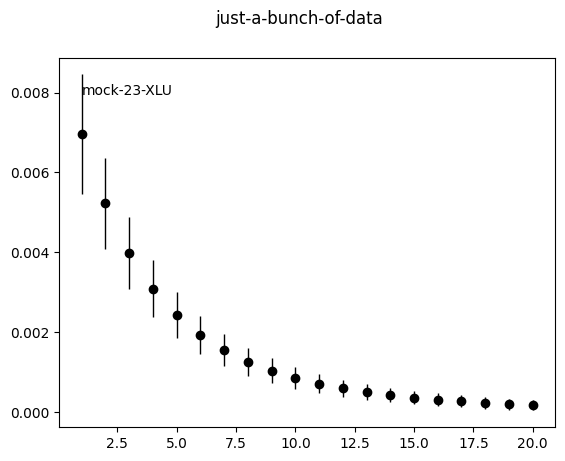

In [34]:
fig = gplots.jbod(points=mockset)

In [35]:
fig.savefig('{}/mock1.pdf'.format(PAPER_DIR))

In [36]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 15),
                    torch.nn.ReLU(),
                    torch.nn.Linear(15, 37),
                    torch.nn.ReLU(),
                    torch.nn.Linear(37, 15),
                    torch.nn.ReLU(),
                    torch.nn.Linear(15, len(self.output_layer))
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [37]:
th = NN(output_layer=['ImH'])
th.name = 'fit'

In [38]:
f = g.fitter.NeuralFitter(mockset, th, nnets=10, nbatch=80, batchlen=2, regularization=None)

In [39]:
f.fit()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/model.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = self.standardize(torch.tensor(input_layer, dtype=torch.float32),



Epoch   2: train error = 10.7814 test error = 12.2699 -
Epoch   4: train error = 9.7160 test error = 10.5818 -
Epoch   6: train error = 7.4470 test error = 6.5135 -
Epoch   8: train error = 3.6007 test error = 2.1345 -
Epoch  10: train error = 2.4072 test error = 1.0349 -
Epoch  12: train error = 0.8052 test error = 1.2903 +
Epoch  14: train error = 0.7364 test error = 1.3288 +
Epoch  16: train error = 0.8044 test error = 0.9987 -
Epoch  18: train error = 0.7441 test error = 0.9351 -
Epoch  20: train error = 0.6280 test error = 0.9293 -
Epoch  22: train error = 0.6535 test error = 0.8703 -
Epoch  24: train error = 0.6236 test error = 0.8176 -
Epoch  26: train error = 0.6104 test error = 0.8029 -
Epoch  28: train error = 0.6018 test error = 0.7411 -
Epoch  30: train error = 0.5892 test error = 0.6981 -
Epoch  32: train error = 0.5760 test error = 0.6615 -
Epoch  34: train error = 0.5588 test error = 0.6001 -
Epoch  36: train error = 0.5475 test error = 0.5571 -
Epoch  38: train error =

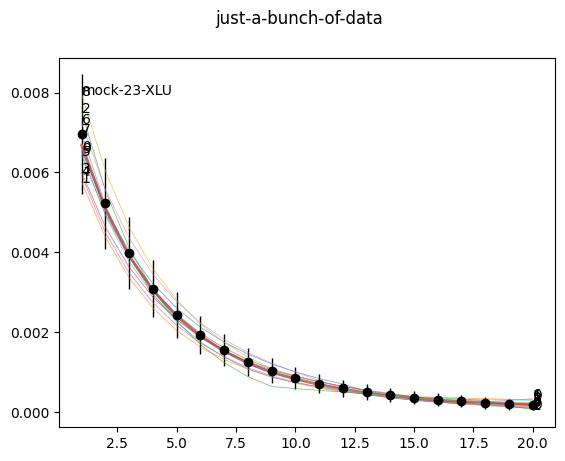

In [40]:
fig = gplots.jbod(points=mockset, lines=[th], mesh=th)

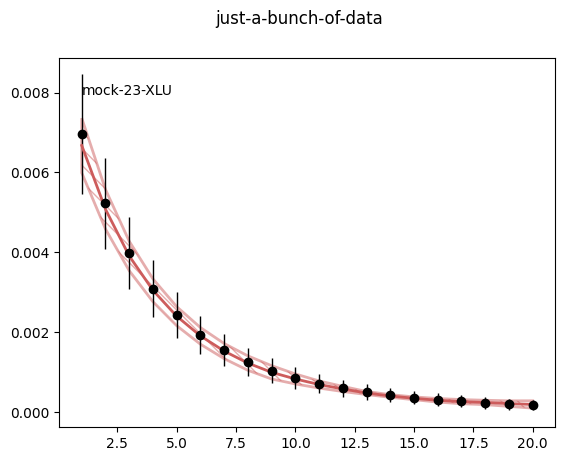

In [41]:
fig = gplots.jbod(points=mockset, lines=[th], bands=[th])

In [42]:
fig.savefig('{}/mock1nn.pdf'.format(PAPER_DIR))

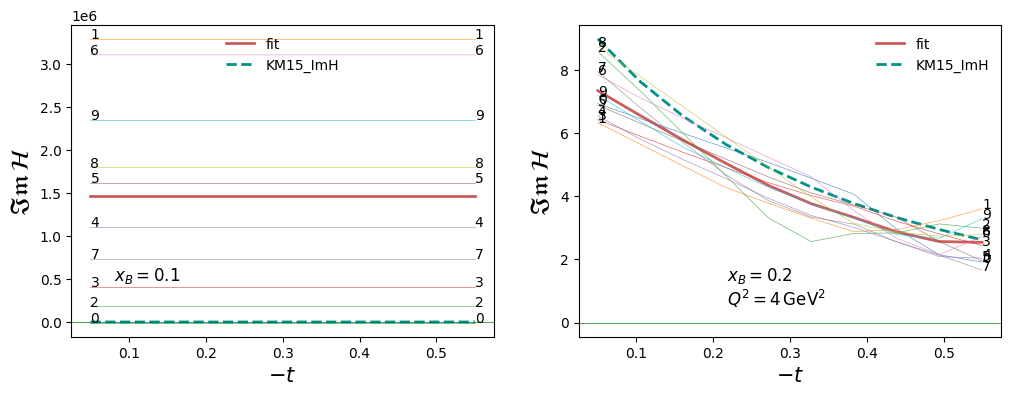

In [54]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], mesh=th)

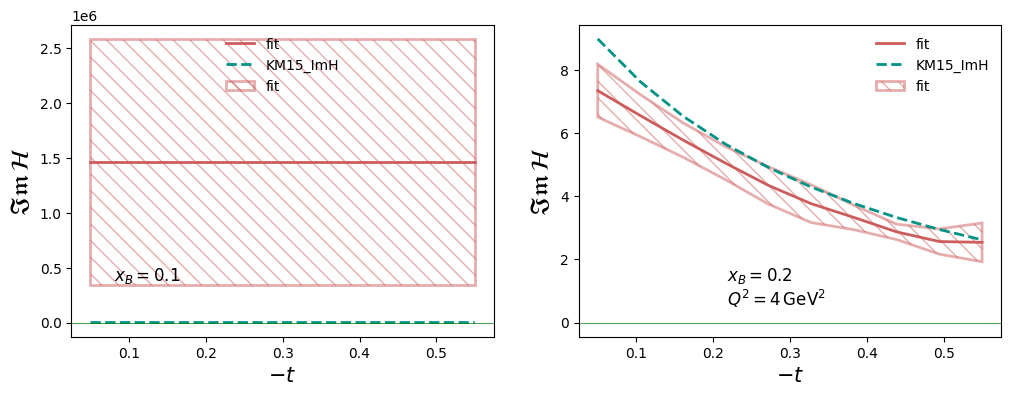

In [55]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], bands=[th])

In [56]:
fig.savefig('{}/mock1cff.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

Perfect (all data is at xB=0.2, so xB=0.1 is not expected to be described well).

# Simulation 2 - XLU only - ImH only - t-dep only - noise

## Data

In [75]:
mockset = []
for tm in np.linspace(0.1, 0.5, 20):
    pt = g.DataPoint(xB=0.2, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                  process='ep2epgamma', exptype='fixed target', frame='Trento',
                  in1energy=12., in1charge=-1, in1polarization=+1,
                  observable='XLU')
    pt.id = 4001
    pt.year = 2023
    pt.collaboration = 'mock'
    pt.reference = 'mock'
    pt.val = th_KM15_ImH.predict(pt)
    pt.err = 0.1 * pt.val + 0.0002
    pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
    mockset.append(pt)
mockset = g.DataSet(mockset)

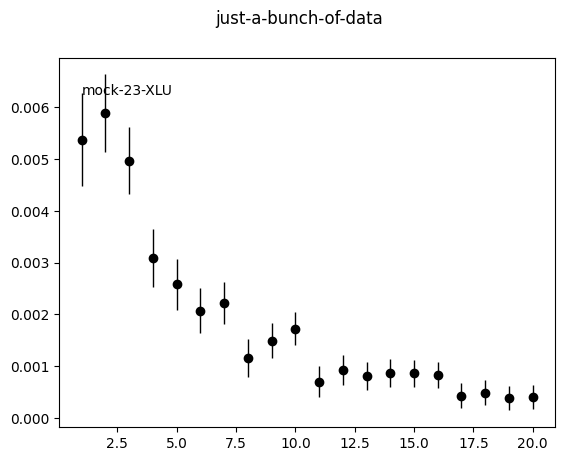

In [76]:
fig = gplots.jbod(points=mockset)

In [77]:
fig.savefig('{}/ImH-tdep.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

## Normal fit

In [78]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 9),
                    torch.nn.ReLU(),
                    torch.nn.Linear(9, 11),
                    torch.nn.ReLU(),
                    torch.nn.Linear(11, len(self.output_layer))
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [79]:
th = NN(output_layer=['ImH'])
th.name = 'fit'

In [80]:
f = g.fitter.NeuralFitter(mockset, th, nnets=5, nbatch=40, regularization='L2', lx_lambda=0.001)

In [81]:
f.fit()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/model.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = self.standardize(torch.tensor(input_layer, dtype=torch.float32),



Epoch   5: train error = 20.0709 test error = 15.3399 -
Epoch  10: train error = 10.9471 test error = 3.8042 -
Epoch  15: train error = 2.5104 test error = 0.4925 -
Epoch  20: train error = 1.5595 test error = 0.5655 +
Epoch  25: train error = 1.4142 test error = 0.5407 +
Epoch  30: train error = 1.3832 test error = 0.6406 +
Epoch  35: train error = 1.3762 test error = 0.6614 +
Epoch  40: train error = 1.3703 test error = 0.6574 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 0.49252161383628845

Epoch   5: train error = 14.3466 test error = 18.5614 -
Epoch  10: train error = 8.5174 test error = 9.0622 -
Epoch  15: train error = 3.2106 test error = 1.6592 -
Epoch  20: train error = 0.9886 test error = 1.5913 -
Epoch  25: train error = 0.8313 test error = 1.7036 +
Epoch  30: train error = 0.8015 test error = 1.7225 +
Epoch  35: train error = 0.7768 test error = 1.7417 +
Epoch  40: train error = 0.7656 test error = 1.7235 +
Epoch  45: train error = 0.7612 test error

In [82]:
th.chisq(mockset)

(tensor(13.9755), 20, tensor(0.8317))

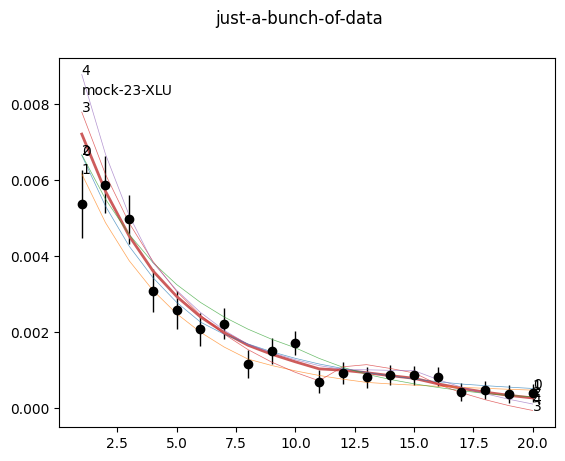

In [83]:
fig = gplots.jbod(points=mockset, lines=[th], mesh=th)

In [84]:
fig.savefig('{}/ImH-mesh.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

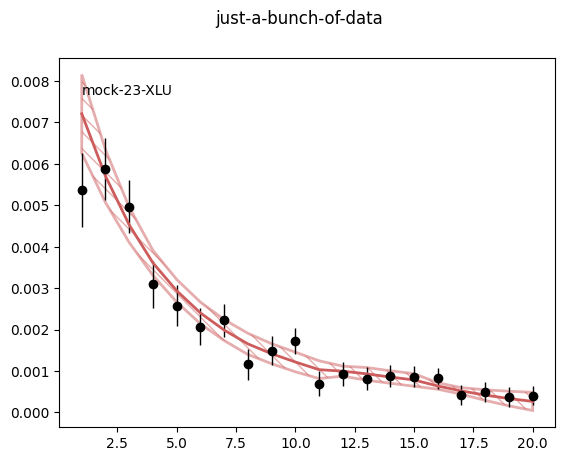

In [85]:
fig = gplots.jbod(points=mockset, lines=[th], bands=[th])

In [86]:
fig.savefig('{}/mock2nn.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

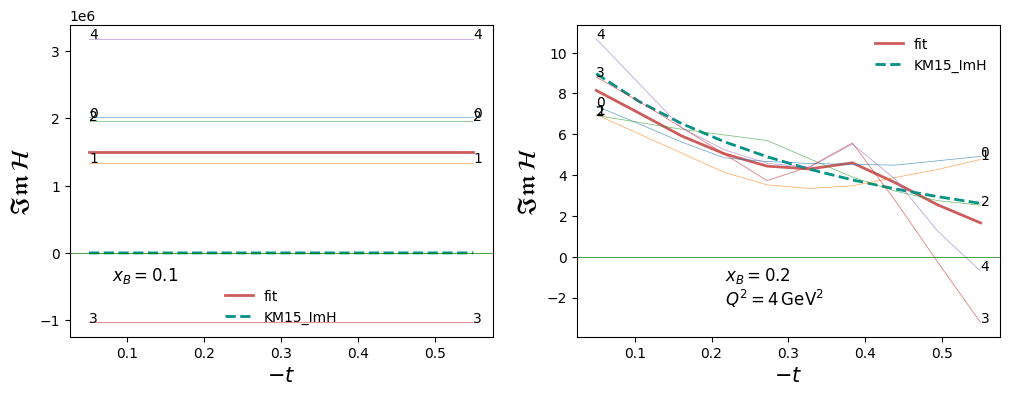

In [87]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], mesh=th)

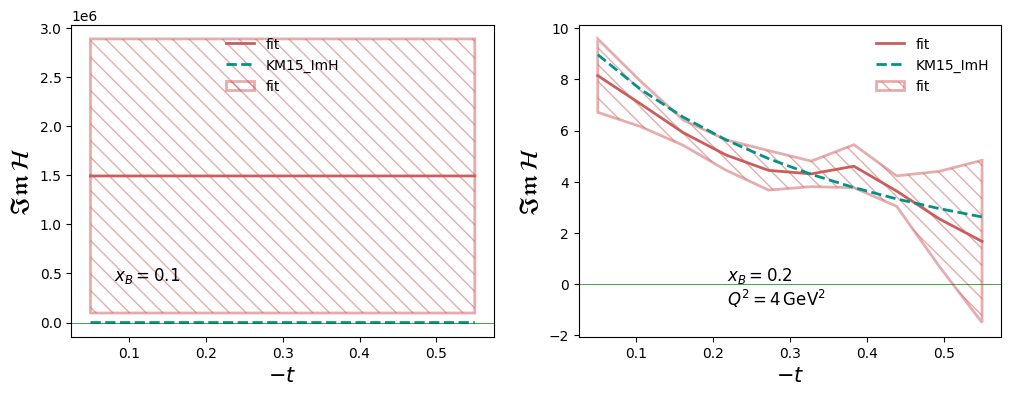

In [88]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], bands=[th])

In [89]:
fig.savefig('{}/mock2cff.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

# Simulation 3 - XLU only - ImH only - xB and t-dep - noise

## Dataset

In [90]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImH.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset = g.DataSet(mockset)

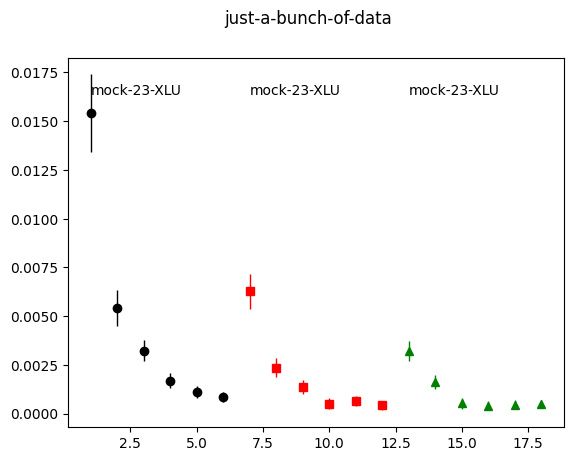

In [91]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]] )

In [92]:
mockset[6].xB, mockset[12].xB, mockset[18].xB

(np.float64(0.15), np.float64(0.2), np.float64(0.25))

## Fit

In [93]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 23),
                    torch.nn.ReLU(),
                    torch.nn.Linear(23, 27),
                    torch.nn.ReLU(),
                    torch.nn.Linear(27, len(self.output_layer))
                    # torch.nn.Sigmoid(),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [94]:
th = NN(output_layer=['ImH'])
th.name = 'fit'

In [95]:
f = g.fitter.NeuralFitter(mockset, th, nnets=10, batchlen=5, regularization='L2', lx_lambda=0.001)

In [96]:
f.fit()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/model.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = self.standardize(torch.tensor(input_layer, dtype=torch.float32),



Epoch   5: train error = 26.1765 test error = 18.8990 -
Epoch  10: train error = 3.2650 test error = 4.1283 -
Epoch  15: train error = 1.2781 test error = 4.9212 +
Epoch  20: train error = 0.9582 test error = 4.3315 +
Epoch  25: train error = 0.5535 test error = 4.7726 +
Epoch  30: train error = 0.3934 test error = 5.4064 +
Epoch  35: train error = 0.2840 test error = 5.5720 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 4.128271102905273

Epoch   5: train error = 31.7627 test error = 11.8053 -
Epoch  10: train error = 7.7696 test error = 15.8680 +
Epoch  15: train error = 2.6296 test error = 5.7012 -
Epoch  20: train error = 1.7325 test error = 3.3085 -
Epoch  25: train error = 1.3871 test error = 2.9734 -
Epoch  30: train error = 1.2217 test error = 3.1374 +
Epoch  35: train error = 1.1225 test error = 3.3566 +
Epoch  40: train error = 1.0433 test error = 3.3761 +
Epoch  45: train error = 1.0070 test error = 3.6652 +
Epoch  50: train error = 0.9615 test error =

In [97]:
th.chisq(mockset)

(tensor(8.4864), 24, tensor(0.9985))

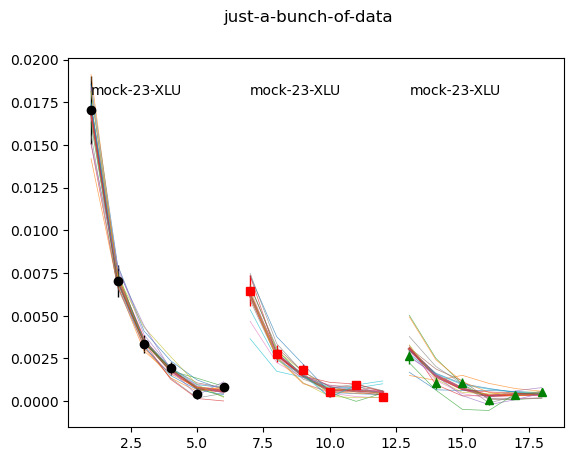

In [68]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]], lines=[th], mesh=th)

In [98]:
fig.savefig('{}XLU-mesh.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

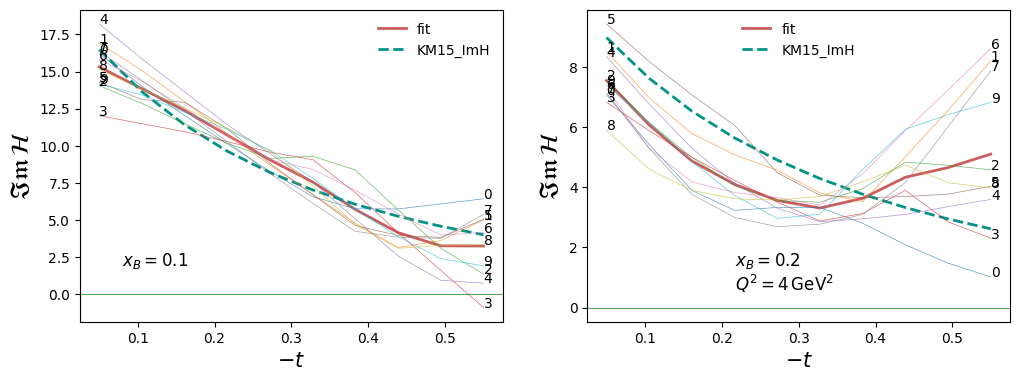

In [99]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], mesh=th)

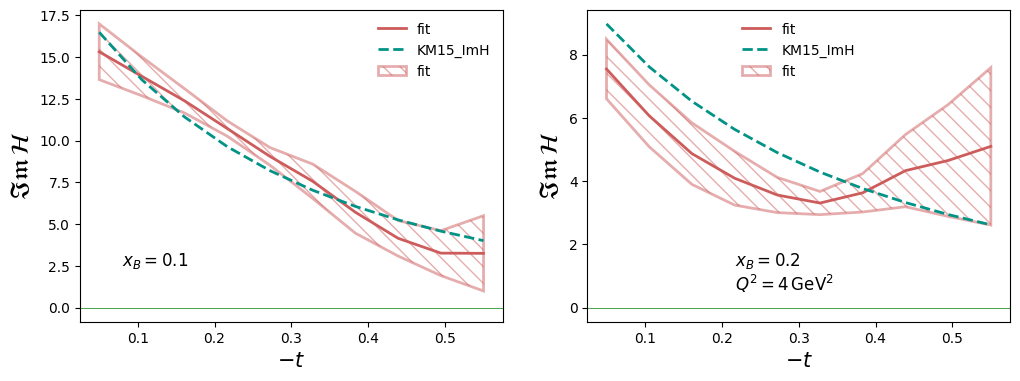

In [100]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], bands=[th])

In [72]:
## fig.savefig('{}ImH-xt.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

# Simulation 3b - AC only - ReE only - xB and t-dep - noise

## Dataset

In [101]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ReE.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset = g.DataSet(mockset)

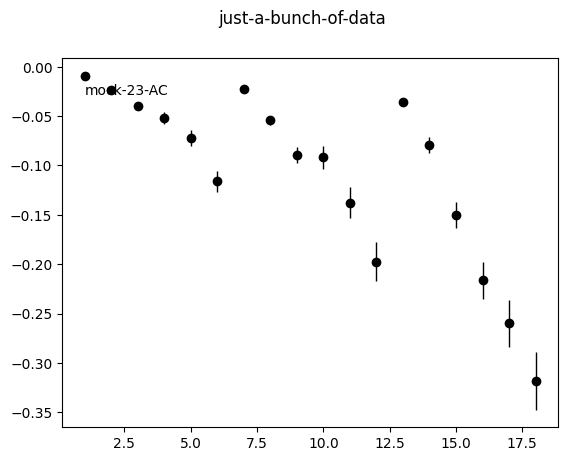

In [102]:
fig = gplots.jbod(points=mockset[6:])

## Fit

In [103]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 13),
                    torch.nn.ReLU(),
                    torch.nn.Linear(13, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer))
                    # torch.nn.Sigmoid(),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [105]:
th = NN(output_layer=['ReE'])
th.name = 'fit'

In [106]:
f = g.fitter.NeuralFitter(mockset, th, nnets=3, batchlen=5, regularization='L2', lx_lambda=0.001)

In [107]:
f.fit()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/model.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = self.standardize(torch.tensor(input_layer, dtype=torch.float32),



Epoch   5: train error = 68.3067 test error = 17.4870 -
Epoch  10: train error = 10.8977 test error = 9.4810 -
Epoch  15: train error = 3.9088 test error = 0.7816 -
Epoch  20: train error = 1.8246 test error = 2.9493 +
Epoch  25: train error = 1.0062 test error = 3.7200 +
Epoch  30: train error = 0.8333 test error = 4.7287 +
Epoch  35: train error = 0.6785 test error = 4.2901 +
Epoch  40: train error = 0.5285 test error = 4.3126 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 0.7816020846366882

Epoch   5: train error = 33.0093 test error = 22.8496 -
Epoch  10: train error = 2.7533 test error = 3.4072 -
Epoch  15: train error = 1.0019 test error = 2.0006 -
Epoch  20: train error = 0.7570 test error = 2.2134 +
Epoch  25: train error = 0.5014 test error = 2.4339 +
Epoch  30: train error = 0.3662 test error = 2.6756 +
Epoch  35: train error = 0.2299 test error = 2.8032 +
Epoch  40: train error = 0.1508 test error = 2.9774 +
No improvement for 5 batches. Stopping earl

In [108]:
th.chisq(mockset)

(tensor(18.0260), 24, tensor(0.8017))

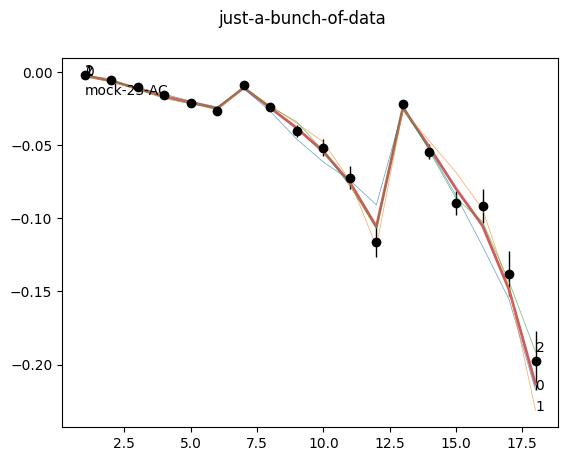

In [109]:
fig = gplots.jbod(points=mockset[:18], lines=[th], mesh=th)

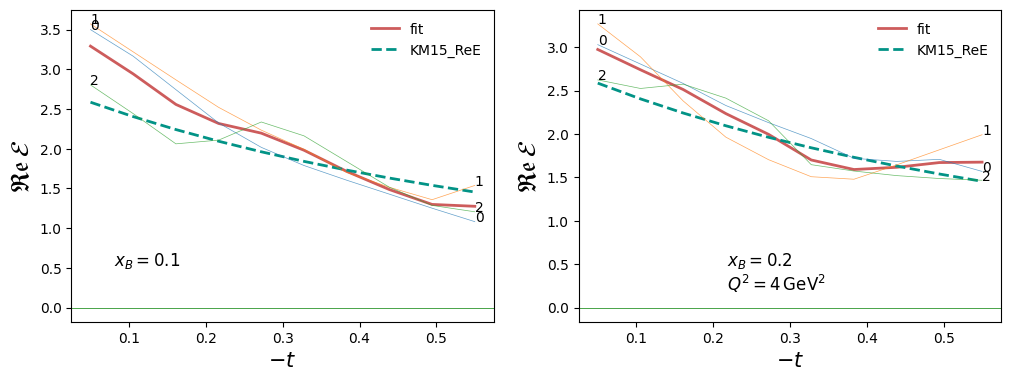

In [110]:
fig = gplots.CFFt(cffs=['ReE'], lines=[th, th_KM15_ReE], mesh=th)

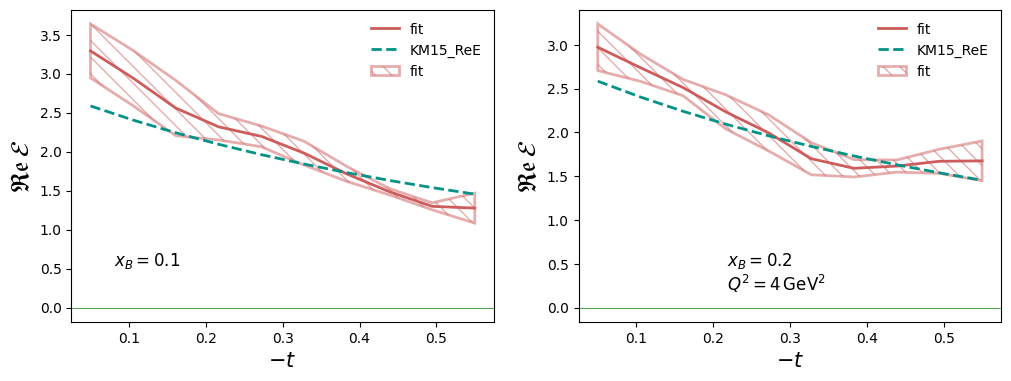

In [111]:
fig = gplots.CFFt(cffs=['ReE'], lines=[th, th_KM15_ReE], bands=[th])

# Simulation 4 - (XLU + XUU) - (ImH + ImE=0) - (xB + t-dep)

## Dataset

We still keep ImE=0 and see if model will recognize it.

In [112]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImH.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [115]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImH.predict(pt)
        pt.err = 0.1 * pt.val + 0.001
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

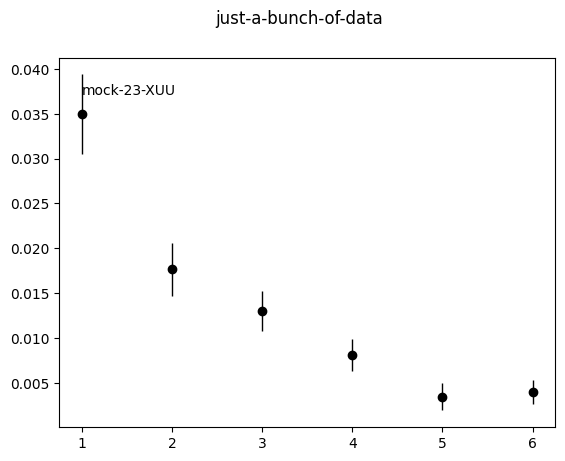

In [116]:
fig = gplots.jbod(points=mockset_XUU[18:])

## Fit

In [117]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 13),
                    torch.nn.ReLU(),
                    torch.nn.Linear(13, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [118]:
th = NN(output_layer=['ImH', 'ImE'])
th.name = 'fit'

In [119]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU],
                          th, nnets=5, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [120]:
f.fit()


Epoch   2: train error = 19.0806 test error = 20.6136 -
Epoch   4: train error = 18.1658 test error = 19.4358 -
Epoch   6: train error = 16.8020 test error = 17.4364 -
Epoch   8: train error = 14.2736 test error = 13.4720 -
Epoch  10: train error = 9.3880 test error = 6.2282 -
Epoch  12: train error = 3.1647 test error = 9.4989 +
Epoch  14: train error = 4.0289 test error = 4.1535 -
Epoch  16: train error = 2.2781 test error = 3.3843 -
Epoch  18: train error = 1.6482 test error = 3.7464 +
Epoch  20: train error = 1.5601 test error = 1.8536 -
Epoch  22: train error = 1.5118 test error = 2.4822 +
Epoch  24: train error = 1.4430 test error = 2.1301 +
Epoch  26: train error = 1.3793 test error = 1.9909 +
Epoch  28: train error = 1.3291 test error = 1.8812 +
Epoch  30: train error = 1.2806 test error = 1.6303 -
Epoch  32: train error = 1.2415 test error = 1.7268 +
Epoch  34: train error = 1.2053 test error = 1.6051 -
Epoch  36: train error = 1.1888 test error = 1.7122 +
Epoch  38: train er

In [123]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUU)))

chisq_XLU = (tensor(9.8760), 24, tensor(0.9950))
chisq_XUU = (tensor(20.2270), 24, tensor(0.6838))


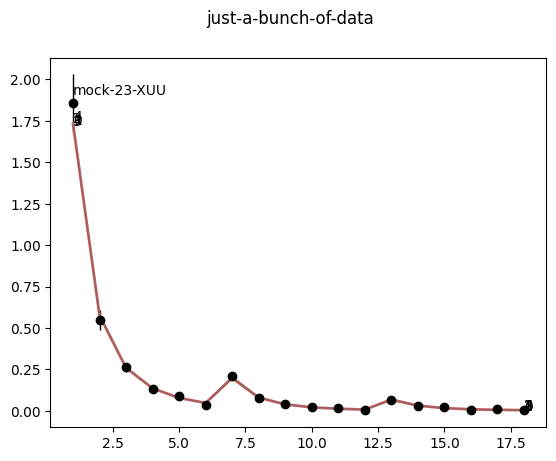

In [122]:
fig = gplots.jbod(points=mockset_XUU[:18], lines=[th], mesh=th)

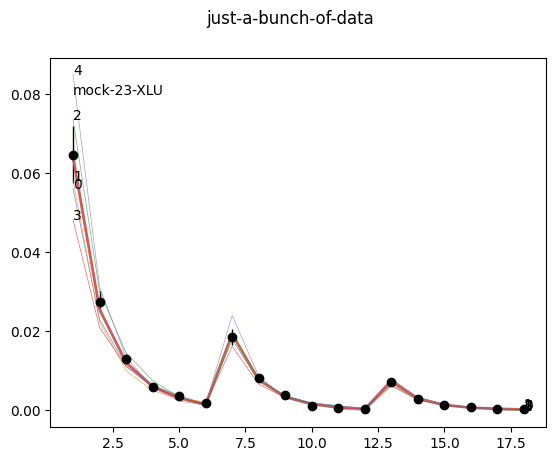

In [124]:
fig = gplots.jbod(points=mockset_XLU[:18], lines=[th], mesh=th)

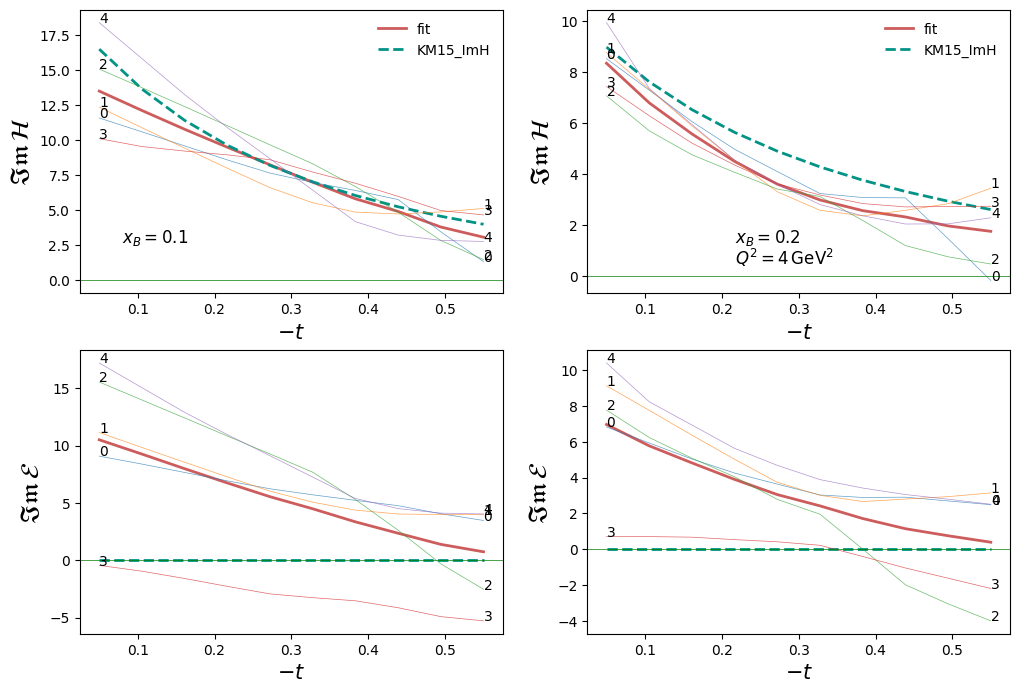

In [125]:
fig = gplots.CFFt(cffs=['ImH', 'ImE'], lines=[th, th_KM15_ImH], mesh=th)

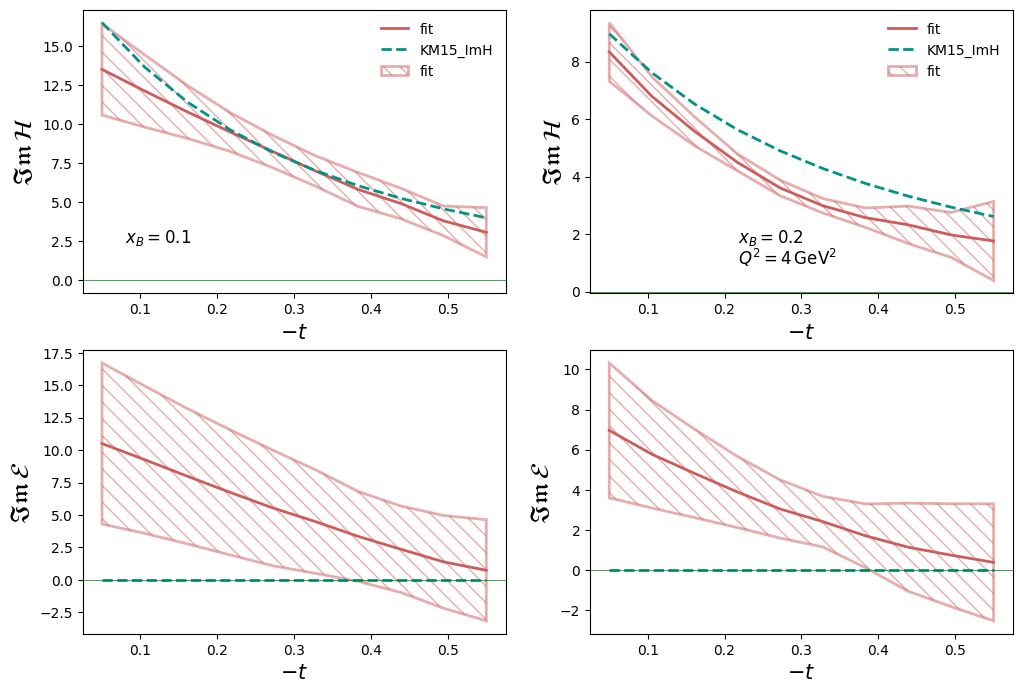

In [126]:
fig = gplots.CFFt(cffs=['ImH', 'ImE'], lines=[th, th_KM15_ImH], bands=[th])

Works very nice ... Some difficulty in reproducing strong rise of ImH with small xB and small -t is maybe due to MC replicas sometimes excluding this extreme point from the training set, so there is overal bias towards functions that are *not* extremal at the edges of data region.

# Simulation 5 - (XLU + XUU) - (ImH + ImHt) - (xB + t-dep)

## Dataset

In [127]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImHHt.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [130]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImHHt.predict(pt)
        pt.err = 0.1 * pt.val + 0.001
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

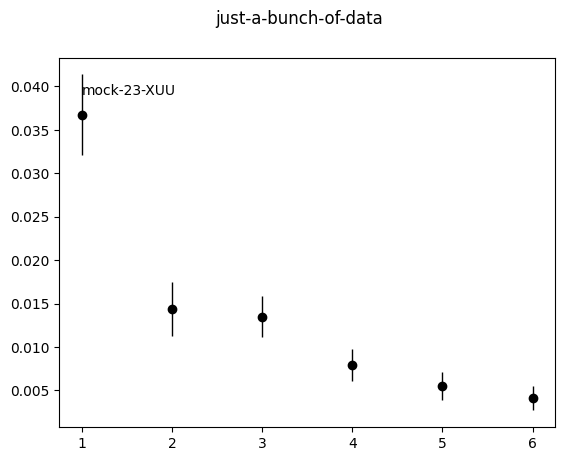

In [131]:
fig = gplots.jbod(points=mockset_XUU[18:])

## Fit

In [132]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 13),
                    torch.nn.ReLU(),
                    torch.nn.Linear(13, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [133]:
th = NN(output_layer=['ImH', 'ImHt'])
th.name = 'fit'

In [134]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU],
                          th, nnets=5, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [135]:
f.fit()


Epoch   2: train error = 19.2399 test error = 20.7609 -
Epoch   4: train error = 18.1549 test error = 19.6268 -
Epoch   6: train error = 16.4747 test error = 17.7454 -
Epoch   8: train error = 13.1323 test error = 13.3977 -
Epoch  10: train error = 7.9861 test error = 8.0116 -
Epoch  12: train error = 7.8587 test error = 6.7282 -
Epoch  14: train error = 5.3640 test error = 4.9591 -
Epoch  16: train error = 3.3829 test error = 2.7198 -
Epoch  18: train error = 1.9550 test error = 3.8324 +
Epoch  20: train error = 1.8735 test error = 3.6279 +
Epoch  22: train error = 1.6942 test error = 3.0972 +
Epoch  24: train error = 1.6193 test error = 3.4682 +
Epoch  26: train error = 1.5759 test error = 3.1287 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 2.719801902770996

Epoch   2: train error = 18.6010 test error = 18.6703 -
Epoch   4: train error = 17.4336 test error = 16.9793 -
Epoch   6: train error = 15.2383 test error = 13.6267 -
Epoch   8: train error = 11.2203 te

In [136]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUU)))

chisq_XLU = (tensor(31.8807), 24, tensor(0.1300))
chisq_XUU = (tensor(22.3991), 24, tensor(0.5555))


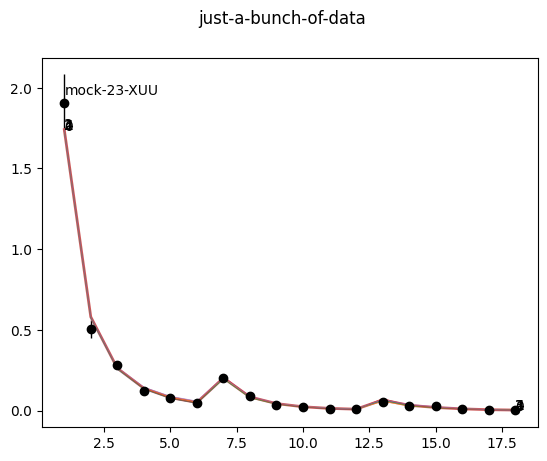

In [137]:
fig = gplots.jbod(points=mockset_XUU[:18], lines=[th], mesh=th)

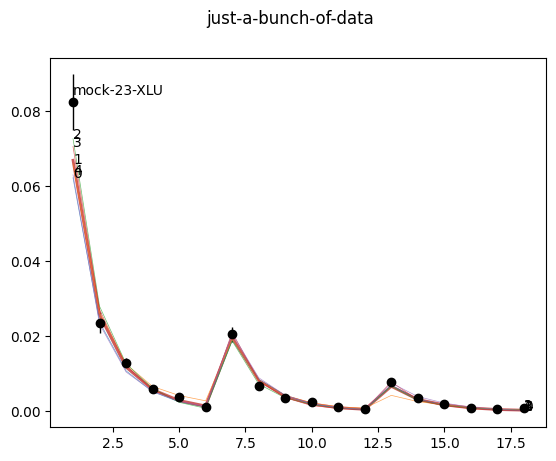

In [138]:
fig = gplots.jbod(points=mockset_XLU[:18], lines=[th], mesh=th)

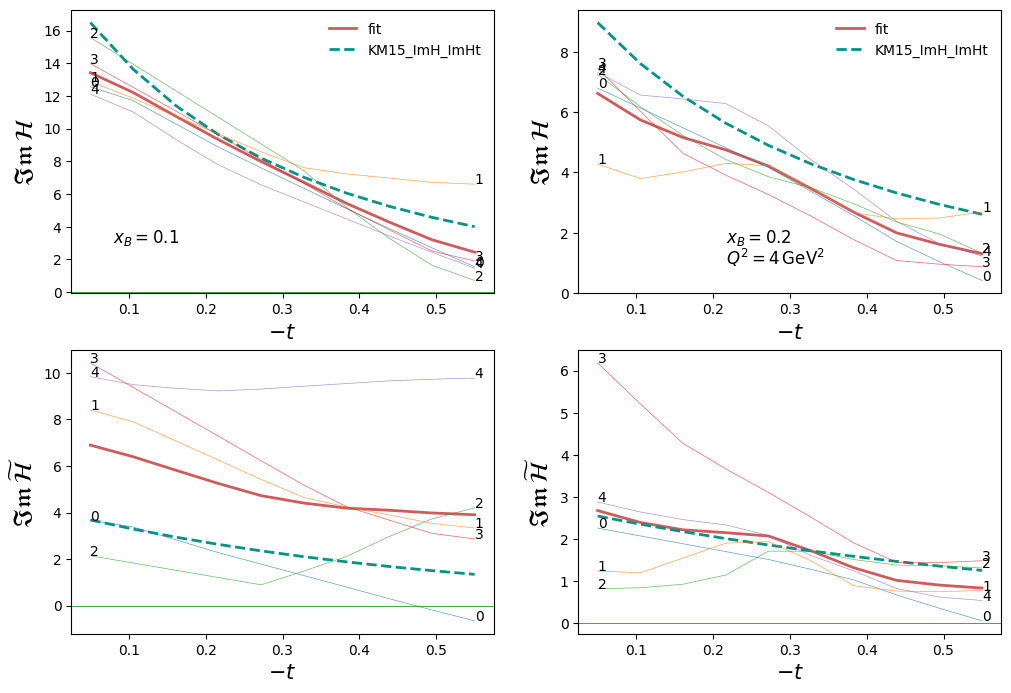

In [139]:
fig = gplots.CFFt(cffs=['ImH', 'ImHt'], lines=[th, th_KM15_ImHHt], mesh=th)

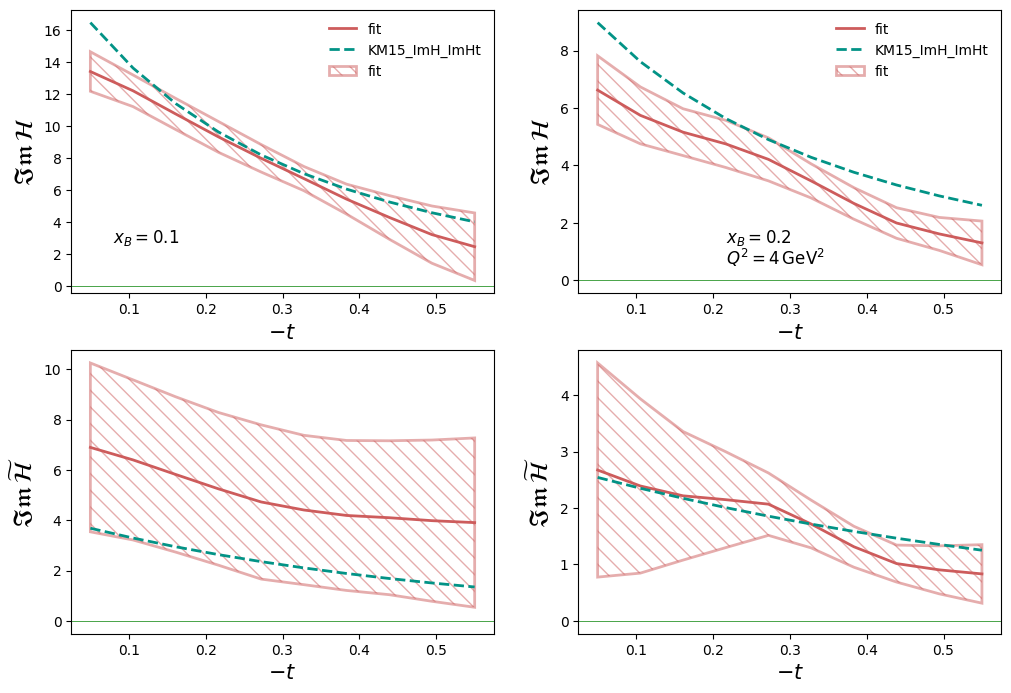

In [140]:
fig = gplots.CFFt(cffs=['ImH', 'ImHt'], lines=[th, th_KM15_ImHHt], bands=[th])

This is very reasonable.

## Uncertainty decrease

In [141]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):
    pass

In [150]:
tholdL2 = NN(output_layer=['ImH', 'ImHt'])
tholdL2.name = 'old-L2'
thnewL2 = NN(output_layer=['ImH', 'ImHt'])
thnewL2.name = 'new-L2'

In [151]:
tholdL1 = NN(output_layer=['ImH', 'ImHt'])
tholdL1.name = 'old-L1'
thnewL1 = NN(output_layer=['ImH', 'ImHt'])
thnewL1.name = 'new-L1'

In [152]:
dirname = 'closure/nets'
netfilename = 'c2_L2'
for k in range(1, 3):
    try:
        tholdL2.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnewL2.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(tholdL2.nets), tholdL2.name))
print("Loaded {} nets for {}".format(len(thnewL2.nets), thnewL2.name))

Loaded 0 nets for old-L2
Loaded 0 nets for new-L2


In [145]:
for net, mean, std in tholdL2.nets:
    net.eval()
for net, mean, std in thnewL2.nets:
    net.eval()

In [147]:
dirname = 'closure/nets'
netfilename = 'c2_L1'
for k in range(1, 3):
    try:
        tholdL1.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnewL1.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(tholdL1.nets), tholdL1.name))
print("Loaded {} nets for {}".format(len(thnewL1.nets), thnewL1.name))

Loaded 0 nets for old-L1
Loaded 0 nets for new-L1


In [148]:
for net, mean, std in tholdL1.nets:
    net.eval()
for net, mean, std in thnewL1.nets:
    net.eval()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/theory.py:179: RuntimeWarning: Mean of empty slice.
  result = res.mean()
/opt/anaconda3/envs/gepard-env-NNP/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/theory.py:140: RuntimeWarning: Mean of empty slice.
  result = (res.mean(), res.std())
/opt/anaconda3/envs/gepard-env-NNP/lib/python3.11/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/gepard-env-NNP/lib/python3.11/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/envs/gepard-env-NNP/lib/python3.11/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid

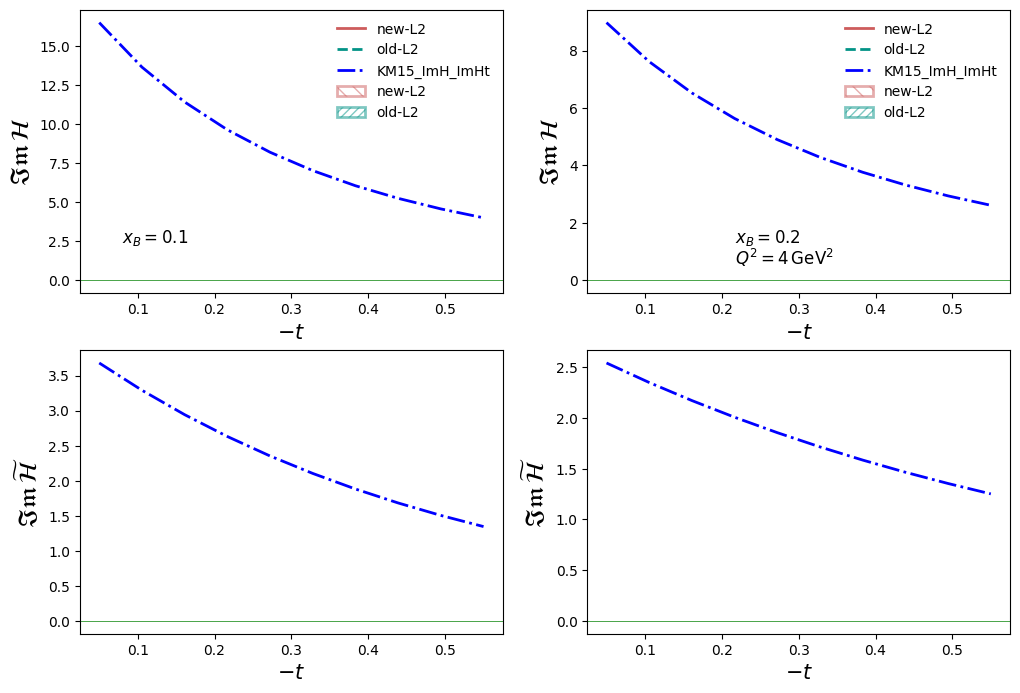

In [149]:
fig = gplots.CFFt(cffs=['ImH', 'ImHt'], lines=[thnewL2, tholdL2, th_KM15_ImHHt], bands=[thnewL2, tholdL2])

# Simulation 5b - (XLU + XC) - (ImH + ReE) - (xB + t-dep)

## Dataset

In [66]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_2.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [67]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4002
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_2.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AC = g.DataSet(mockset)

## Fit

In [68]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 23),
                    torch.nn.ReLU(),
                    torch.nn.Linear(23, 27),
                    torch.nn.ReLU(),
                    torch.nn.Linear(27, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [69]:
th = NN(output_layer=['ImH', 'ReE'])
th.name = 'NNet fit'

In [70]:
dirname = 'clos'
netfilename = 'imhree'
for k in range(1, 6):
    try:
        th.nets += torch.load('{}/{}-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets".format(len(th.nets)))

Loaded 0 nets


In [71]:
for net, mean, std in th.nets:
    net.eval()

In [72]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_AC],
                          th, nnets=5, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [73]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_AC],
                          th, nnets=5, nbatch=50, batchlen=2, regularization=None, smear_replica=False)

In [74]:
f.fit()


Epoch   2: train error = 79.8048 test error = 74.6820 -
Epoch   4: train error = 69.2599 test error = 168.8960 
Hopeless. Giving up

Epoch   2: train error = 83.3111 test error = 85.6412 -
Epoch   4: train error = 70.7446 test error = 69.2477 -
Epoch   6: train error = 61.0536 test error = 60.4230 -
Epoch   8: train error = 42.7545 test error = 34.5075 -
Epoch  10: train error = 14.8431 test error = 6.0279 -
Epoch  12: train error = 11.6030 test error = 3.1386 -
Epoch  14: train error = 4.6349 test error = 6.9501 +
Epoch  16: train error = 6.0333 test error = 4.7464 +
Epoch  18: train error = 4.3539 test error = 3.3867 +
Epoch  20: train error = 3.6577 test error = 3.3834 +
Epoch  22: train error = 3.2053 test error = 2.8164 -
Epoch  24: train error = 2.9109 test error = 2.9015 +
Epoch  26: train error = 2.7326 test error = 3.2093 +
Epoch  28: train error = 2.6651 test error = 2.7946 -
Epoch  30: train error = 2.5488 test error = 3.0456 +
Epoch  32: train error = 2.4419 test error = 2

In [75]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XC = {}'.format(th.chisq(mockset_AC)))

chisq_XLU = (tensor(22.3469), 24, tensor(0.5586, dtype=torch.float64))
chisq_XC = (tensor(28.8641), 24, tensor(0.2253, dtype=torch.float64))


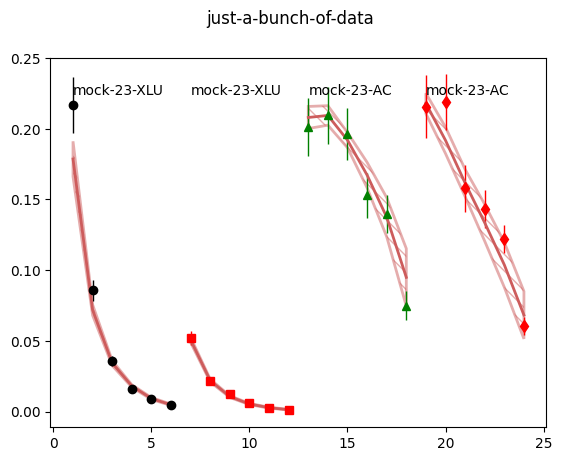

In [77]:
fig = gplots.jbod(points=[mockset_XLU[0:6], mockset_XLU[6:12], mockset_AC[6:12], mockset_AC[12:18]], lines=[th], bands=[th])

In [78]:
fig.savefig('{}/XLU-AC-mesh.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

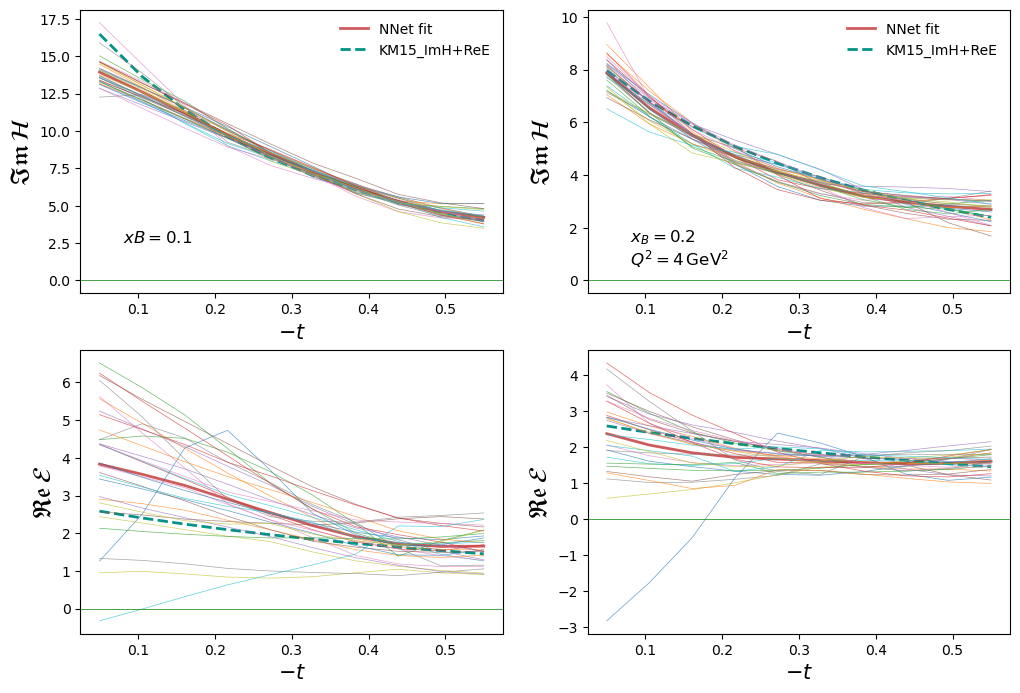

In [194]:
fig = gplots.CFFt(cffs=['ImH', 'ReE'], lines=[th, th_KM15_2], mesh=th)

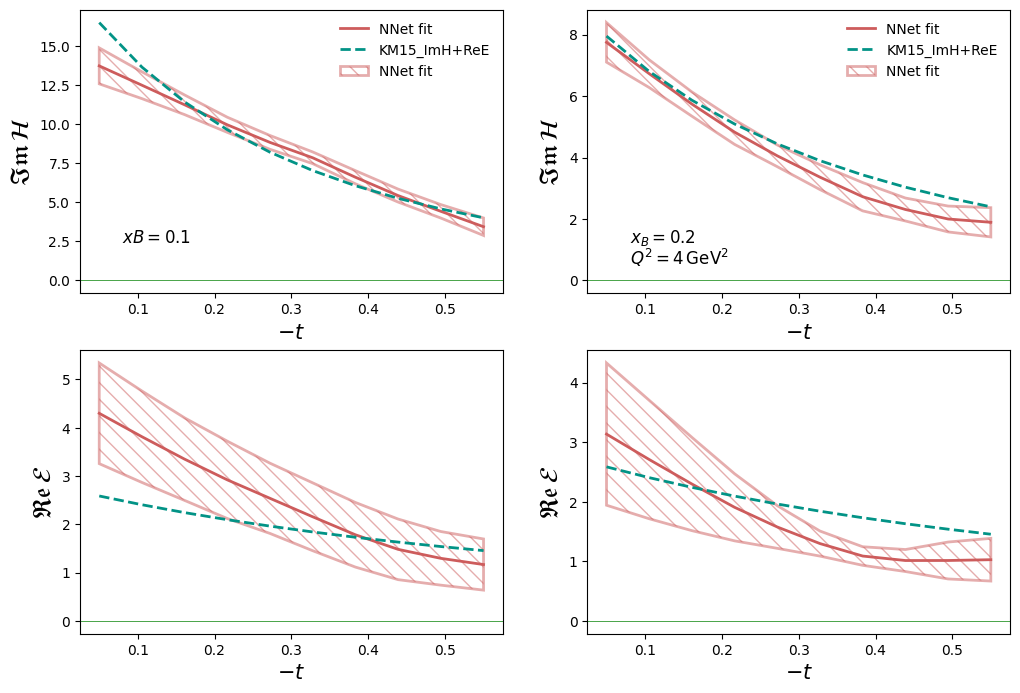

In [88]:
fig = gplots.CFFt(cffs=['ImH', 'ReE'], lines=[th, th_KM15_2], bands=[th])

In [90]:
fig.savefig('{}/ImH_ReE-band.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

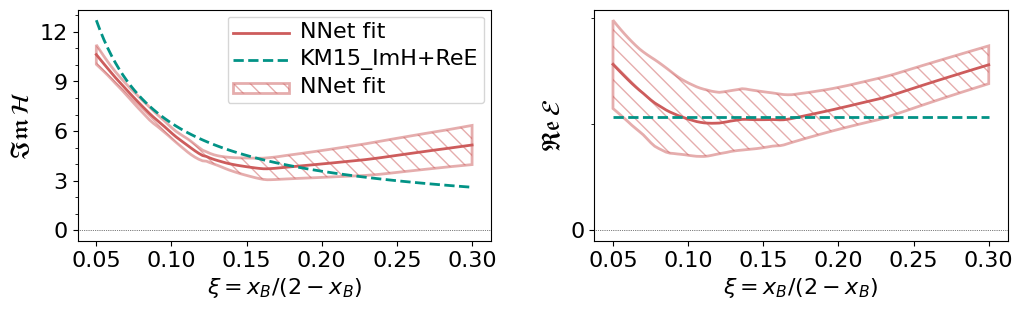

In [91]:
fig = gplots.CFF3(cffs=['ImH', 'ReE'], lines=[th, th_KM15_2], bands=[th])

In [92]:
fig.savefig('{}/ImH_ReE-xdata.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

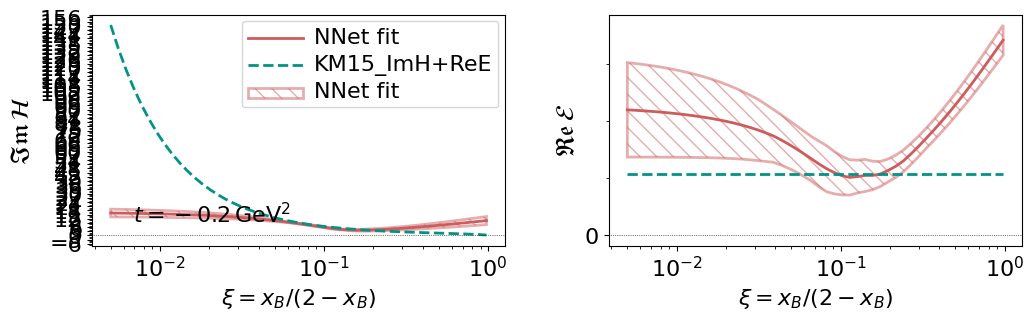

In [93]:
fig = gplots.CFF3log(cffs=['ImH', 'ReE'], lines=[th, th_KM15_2], bands=[th])

In [94]:
fig.savefig('{}/ImH_ReE-xlog.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

# Simulation 6 - (XLU + XUU + ALU) - (ImH + ReE + ImHt) - (xB + t-dep)

## Dataset

In [149]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_3.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [150]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4002
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_3.predict(pt)
        pt.err = 0.1 * pt.val + 0.001
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

In [151]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='ALU')
        pt.id = 4003
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_3.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_ALU = g.DataSet(mockset)

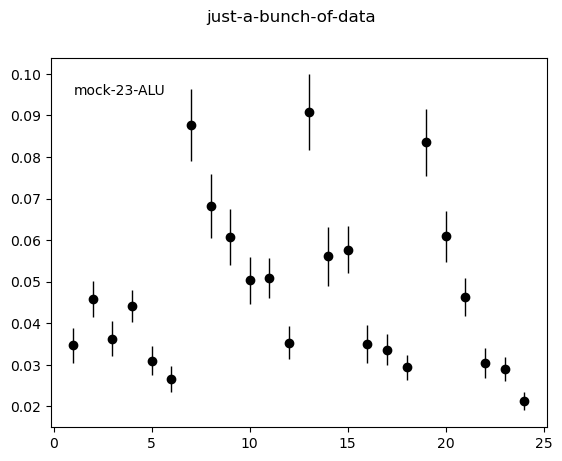

In [152]:
fig = gplots.jbod(points=mockset_ALU)

## Fit

In [90]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 13),
                    torch.nn.ReLU(),
                    torch.nn.Linear(13, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [101]:
th = NN(output_layer=['ImH', 'ReE', 'ImHt'])
th.name = 'fit'

In [102]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU, mockset_ALU],
                          th, nnets=5, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [103]:
f.fit()


Epoch   2: train error = 47.4206 test error = 45.3064 -
Epoch   4: train error = 41.2569 test error = 38.6973 -
Epoch   6: train error = 33.5830 test error = 30.6732 -
Epoch   8: train error = 24.4299 test error = 20.4011 -
Epoch  10: train error = 18.7307 test error = 14.7441 -
Epoch  12: train error = 14.6315 test error = 11.0653 -
Epoch  14: train error = 9.5528 test error = 5.3941 -
Epoch  16: train error = 4.8175 test error = 3.2304 -
Epoch  18: train error = 2.6161 test error = 3.0968 -
Epoch  20: train error = 2.2169 test error = 2.4768 -
Epoch  22: train error = 2.2034 test error = 2.8912 +
Epoch  24: train error = 2.1687 test error = 2.6283 +
Epoch  26: train error = 2.1146 test error = 2.6953 +
Epoch  28: train error = 2.0995 test error = 2.6160 +
Epoch  30: train error = 2.0673 test error = 2.6744 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 2.4767746925354004

Epoch   2: train error = 48.5046 test error = 41.9379 -
Epoch   4: train error = 40.3928 t

In [104]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUU)))
print('chisq_ALU = {}'.format(th.chisq(mockset_ALU)))

chisq_XLU = (tensor(95.3680), 120, tensor(0.9526, dtype=torch.float64))
chisq_XUU = (tensor(20.1912), 24, tensor(0.6859, dtype=torch.float64))
chisq_ALU = (tensor(12.9276), 24, tensor(0.9673, dtype=torch.float64))


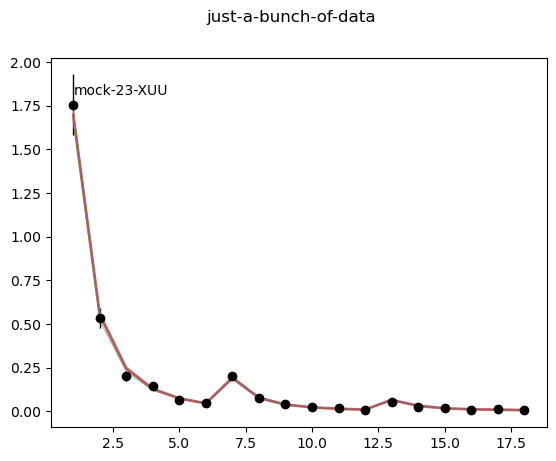

In [105]:
fig = gplots.jbod(points=mockset_XUU[:18], lines=[th], mesh=th)

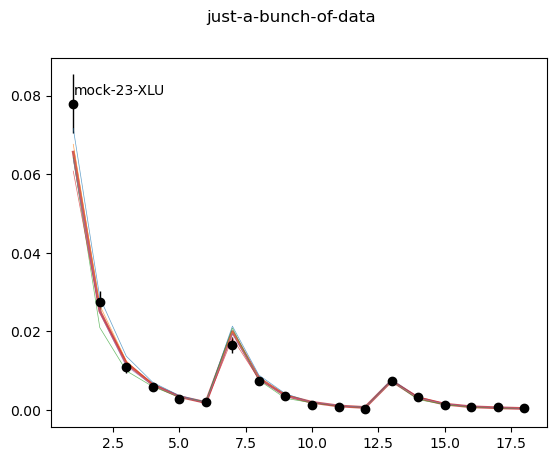

In [106]:
fig = gplots.jbod(points=mockset_XLU[:18], lines=[th], mesh=th)

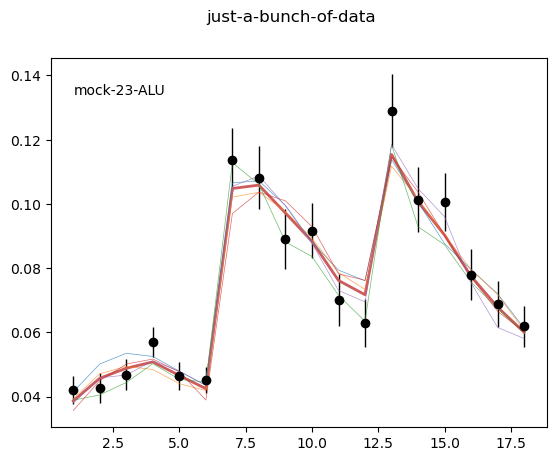

In [107]:
fig = gplots.jbod(points=mockset_ALU[:18], lines=[th], mesh=th)

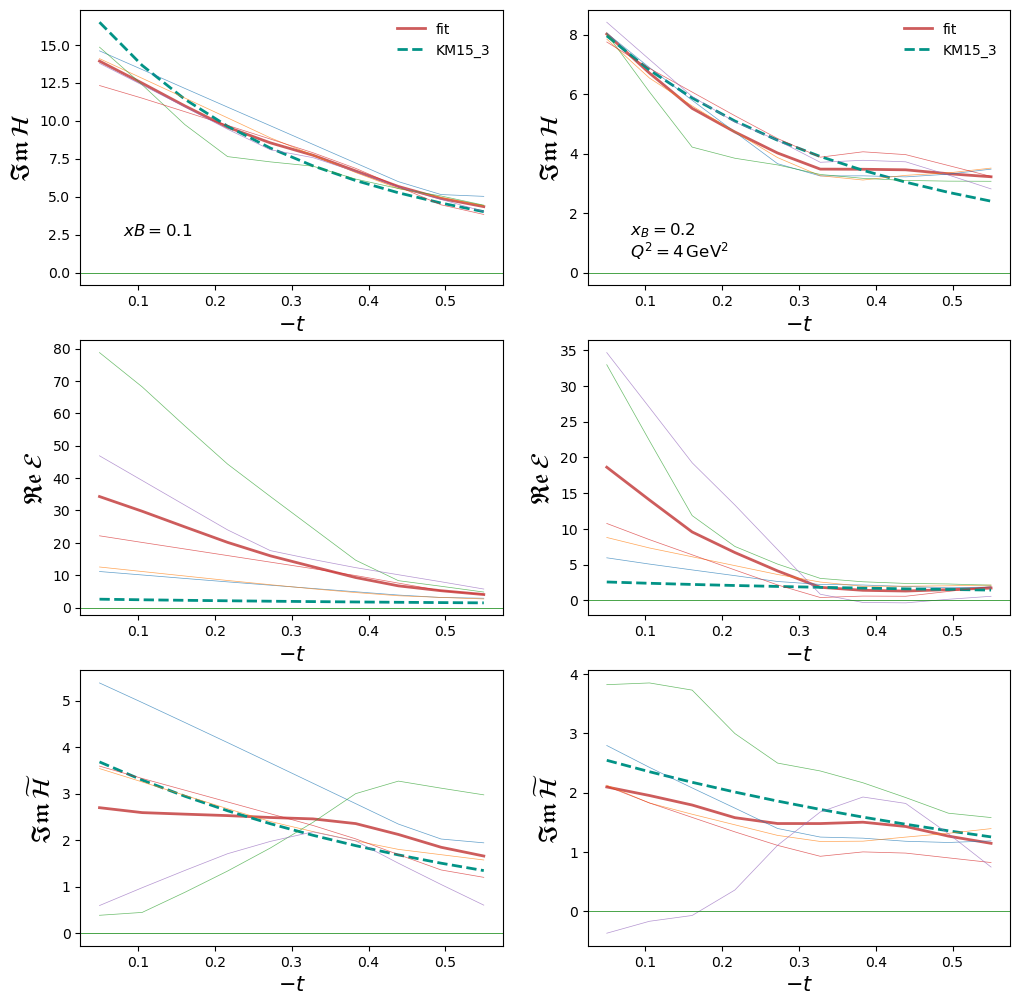

In [110]:
fig = gplots.CFFt(cffs=['ImH', 'ReE', 'ImHt'], lines=[th, th_KM15_3], mesh=th)

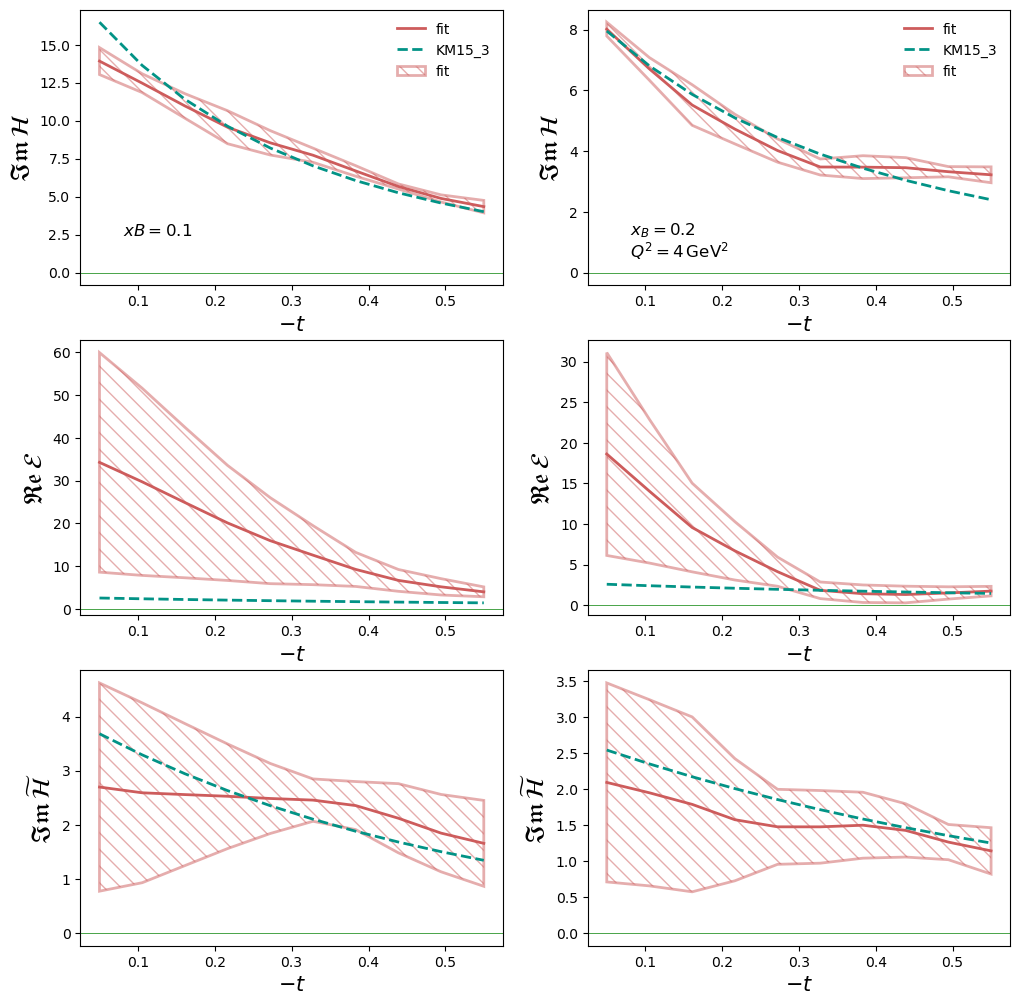

In [111]:
fig = gplots.CFFt(cffs=['ImH', 'ReE', 'ImHt'], lines=[th, th_KM15_3], bands=[th])

Still not so bad. Sensitivity of ReE is weak - not surprising since only XUU has some weak contribution.

# Simulation 7 - (XLU + XUU + ALU + AC) - (ImH + ReH + ReE + ImHt) - (xB + t-dep)

## Dataset

In [267]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [268]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4002
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.001
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

In [269]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='ALU')
        pt.id = 4003
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_ALU = g.DataSet(mockset)

In [270]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4004
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AC = g.DataSet(mockset)

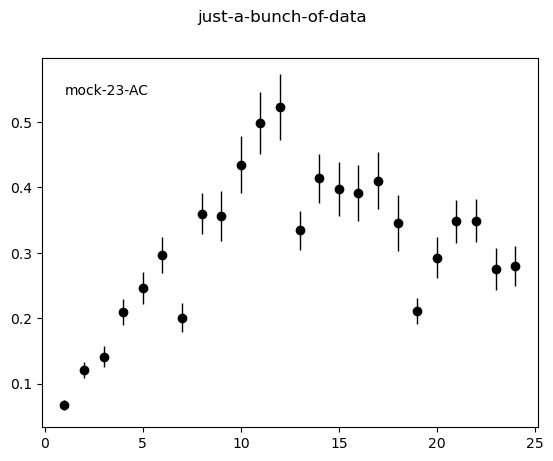

In [271]:
fig = gplots.jbod(points=mockset_AC)

In [272]:
len(mockset_XLU),  len(mockset_XUU),  len(mockset_ALU),  len(mockset_AC)

(24, 24, 24, 24)

## Fit

In [273]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 13),
                    torch.nn.ReLU(),
                    torch.nn.Linear(13, 27),
                    torch.nn.ReLU(),
                    torch.nn.Linear(27, 17),
                    torch.nn.ReLU(),
                    torch.nn.Linear(17, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [274]:
th = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
th.name = 'fit'

In [275]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU, mockset_ALU, mockset_AC],
                          th, nnets=5, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [276]:
f.fit()


Epoch   2: train error = 81.5418 test error = 77.4800 -
Epoch   4: train error = 63.7890 test error = 58.2329 -
Epoch   6: train error = 47.2293 test error = 39.4317 -
Epoch   8: train error = 27.6893 test error = 20.9178 -
Epoch  10: train error = 9.6519 test error = 12.4617 -
Epoch  12: train error = 5.6767 test error = 6.8741 -
Epoch  14: train error = 4.4859 test error = 4.7735 -
Epoch  16: train error = 4.1704 test error = 4.8910 +
Epoch  18: train error = 3.5714 test error = 4.0375 -
Epoch  20: train error = 3.1118 test error = 3.7927 -
Epoch  22: train error = 2.5124 test error = 2.9424 -
Epoch  24: train error = 2.2870 test error = 2.7918 -
Epoch  26: train error = 2.0785 test error = 3.2974 +
Epoch  28: train error = 1.9245 test error = 2.9919 +
Epoch  30: train error = 1.7633 test error = 3.3222 +
Epoch  32: train error = 1.6800 test error = 3.2082 +
Epoch  34: train error = 1.5599 test error = 3.3683 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 2.791

In [216]:
torch.save(th.nets, 'one.tar')

In [277]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUU)))
print('chisq_ALU = {}'.format(th.chisq(mockset_ALU)))
print('chisq_AC = {}'.format(th.chisq(mockset_AC)))

chisq_XLU = (tensor(29.0409), 24, tensor(0.2186, dtype=torch.float64))
chisq_XUU = (tensor(16.0198), 24, tensor(0.8874, dtype=torch.float64))
chisq_ALU = (tensor(30.8033), 24, tensor(0.1595, dtype=torch.float64))
chisq_AC = (tensor(22.0342), 24, tensor(0.5772, dtype=torch.float64))


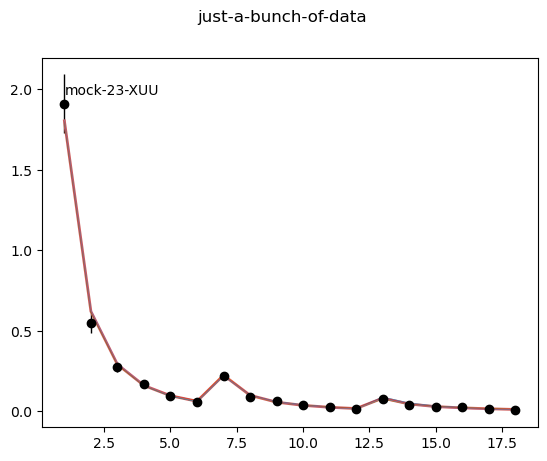

In [278]:
fig = gplots.jbod(points=mockset_XUU[:18], lines=[th], mesh=th)

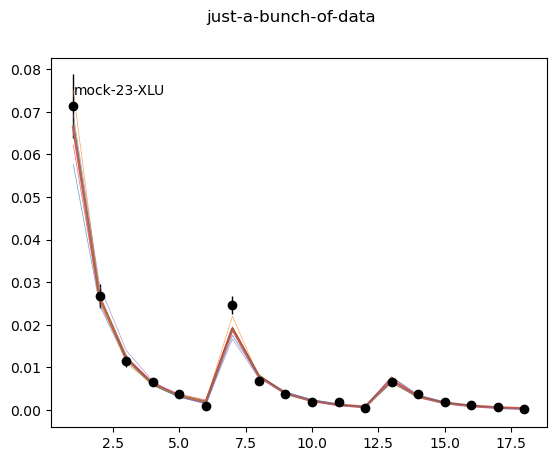

In [279]:
fig = gplots.jbod(points=mockset_XLU[:18], lines=[th], mesh=th)

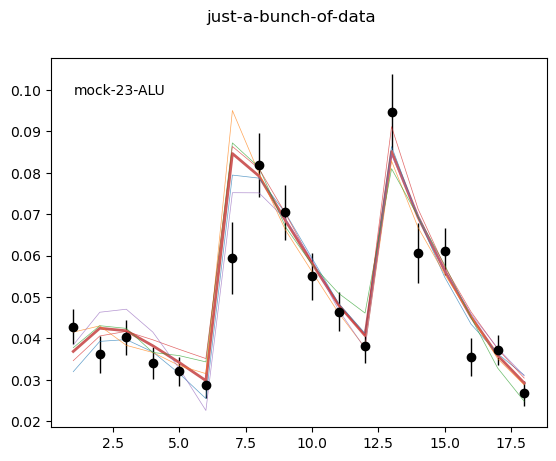

In [280]:
fig = gplots.jbod(points=mockset_ALU[:18], lines=[th], mesh=th)

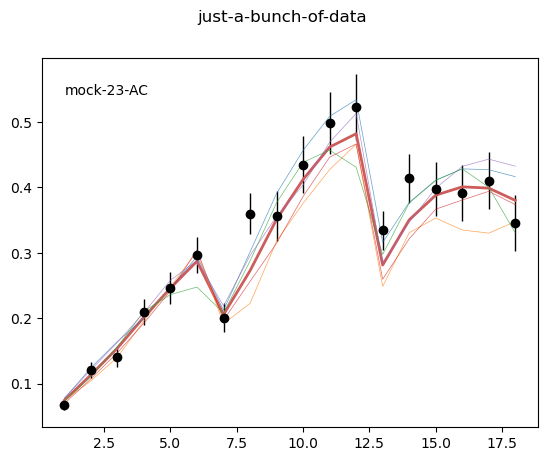

In [281]:
fig = gplots.jbod(points=mockset_AC[:18], lines=[th], mesh=th)

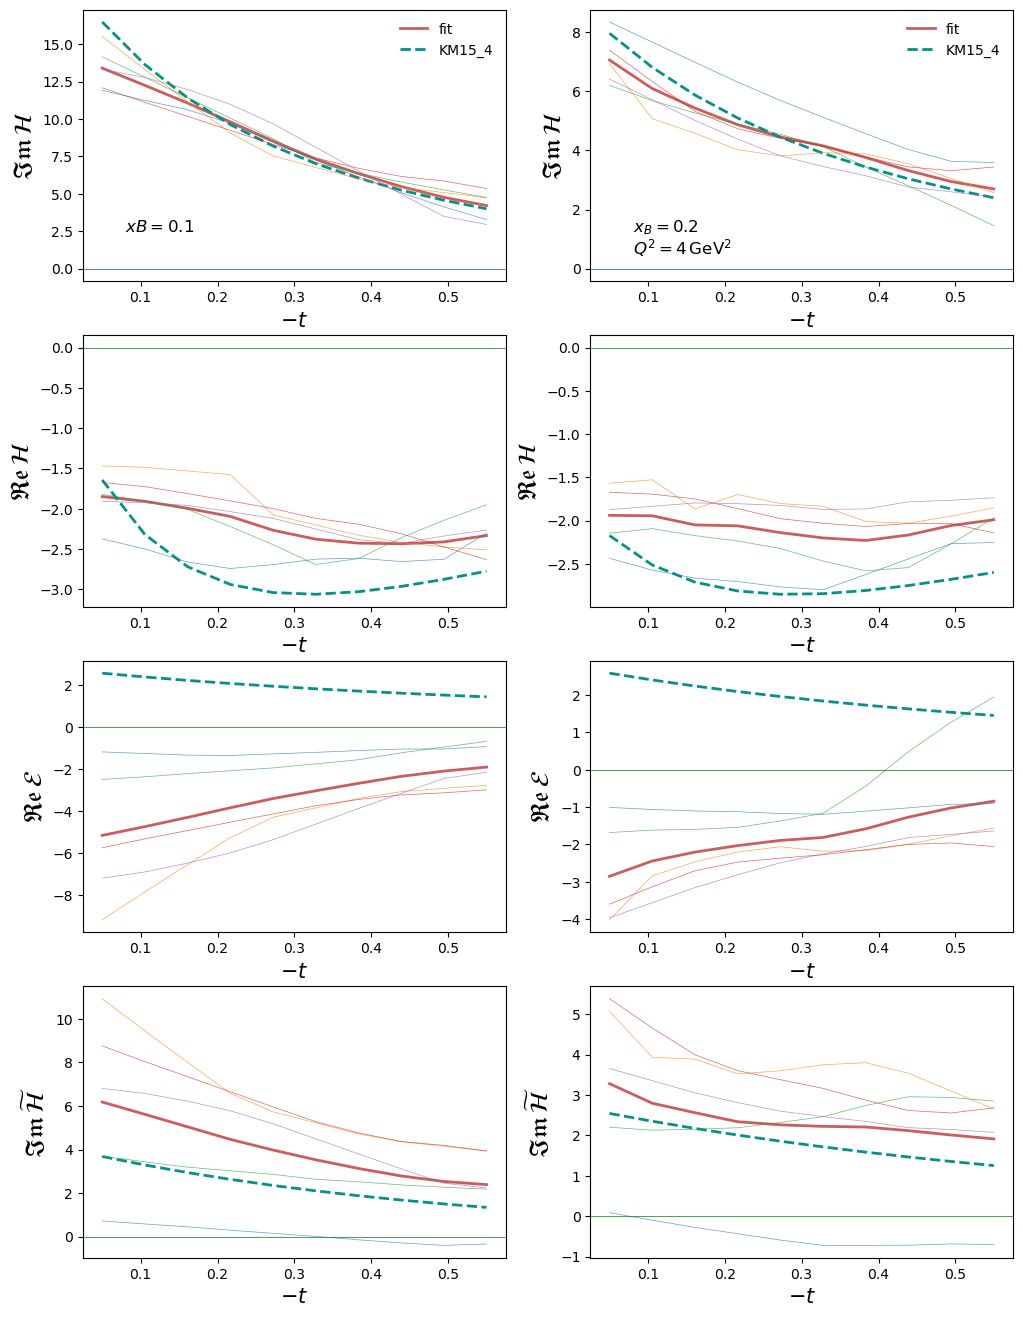

In [282]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[th, th_KM15_4], mesh=th)

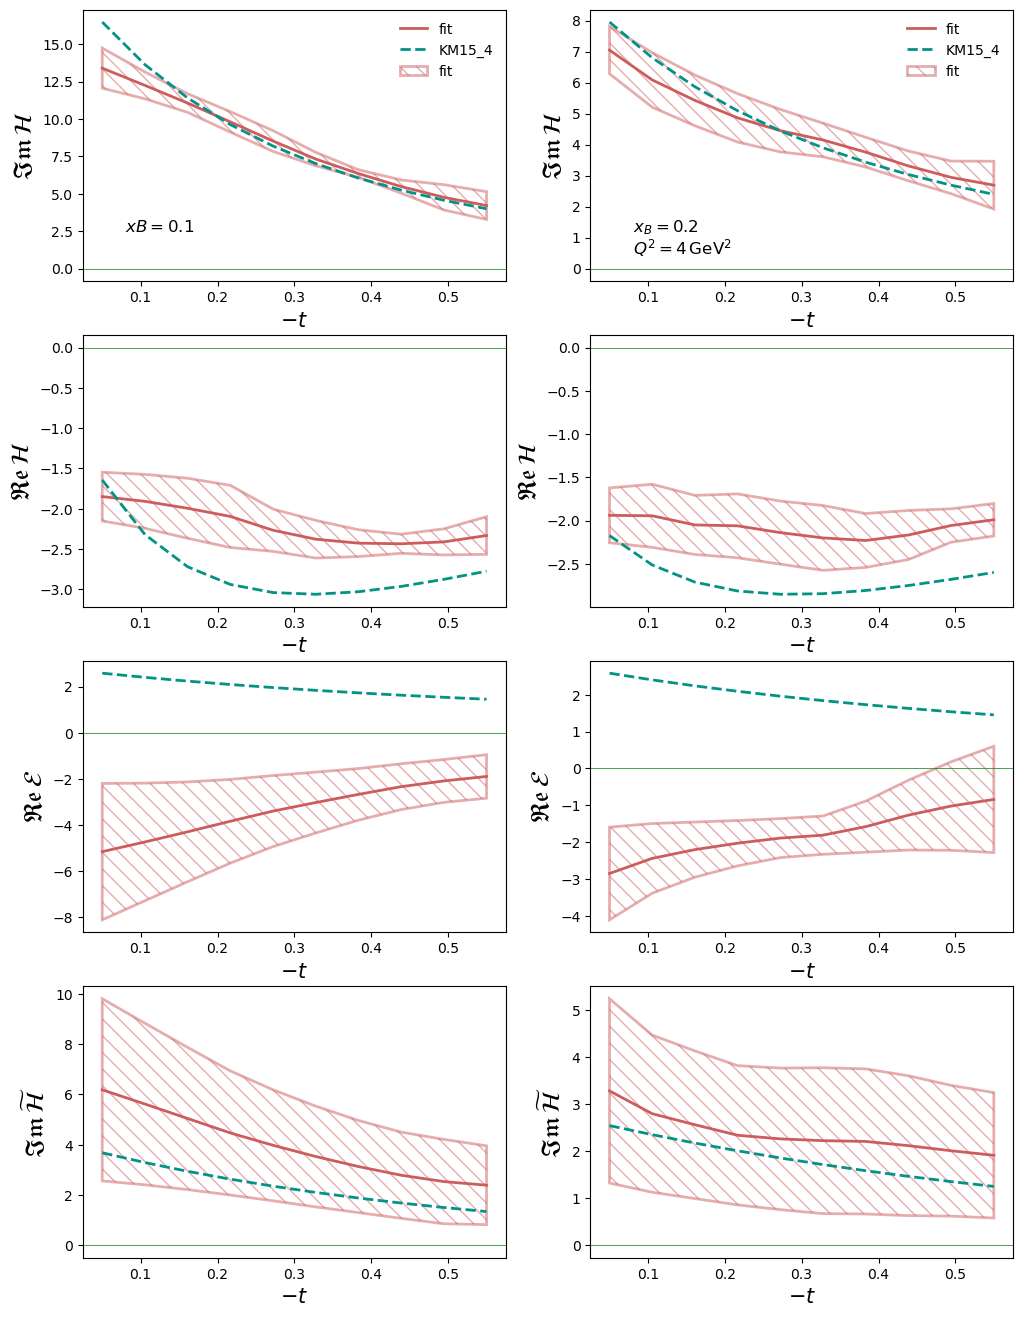

In [283]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[th, th_KM15_4], bands=[th])

# Simulation 8 - (XLU + XUU + ALU + AC + AUT,DVCS) - (ImH + ReH + ReE + ImHt) - (xB + t-dep)

## Dataset

In [42]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [43]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4002
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

In [44]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      in2polarizationvector='L', in2polarization=+1,
                      observable='XUL')
        pt.id = 4003
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUL = g.DataSet(mockset)

In [45]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4004
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AC = g.DataSet(mockset)

In [46]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      in2polarizationvector='T', in2polarization=+1, varphi=torch.tensor(0.3),
                      observable='AUTDVCS')
        pt.id = 4005
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_4.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AUTDVCS = g.DataSet(mockset)

In [47]:
len(mockset_XLU),  len(mockset_XUU),  len(mockset_XUL),  len(mockset_AC),  len(mockset_AUTDVCS)

(24, 24, 24, 24, 24)

## Fit

In [119]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 23),
                    torch.nn.ReLU(),
                    torch.nn.Linear(23, 37),
                    torch.nn.ReLU(),
                    torch.nn.Linear(37, 27),
                    torch.nn.ReLU(),
                    torch.nn.Linear(27, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [148]:
th = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
th.name = 'fit'

In [149]:
dirname = 'clos'
netfilename = 'cff4'
for k in range(1, 6):
    try:
        th.nets += torch.load('{}/{}-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets".format(len(th.nets)))

Loaded 20 nets


In [121]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU, mockset_XUL, mockset_AC, mockset_AUTDVCS],
                          th, nnets=3, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [122]:
f.fit()


Epoch   2: train error = 24.4076 test error = 25.3406 -
Epoch   4: train error = 15.9762 test error = 16.2080 -
Epoch   6: train error = 9.7878 test error = 5.8470 -
Epoch   8: train error = 7.0874 test error = 4.7380 -
Epoch  10: train error = 4.8661 test error = 3.1658 -
Epoch  12: train error = 2.7718 test error = 2.2919 -
Epoch  14: train error = 2.2233 test error = 2.1747 -
Epoch  16: train error = 1.7586 test error = 2.0184 -
Epoch  18: train error = 1.5191 test error = 2.1628 +
Epoch  20: train error = 1.3681 test error = 1.8847 -
Epoch  22: train error = 1.2873 test error = 2.0788 +
Epoch  24: train error = 1.2230 test error = 1.9598 +
Epoch  26: train error = 1.1766 test error = 2.1092 +
Epoch  28: train error = 1.1341 test error = 2.1952 +
Epoch  30: train error = 1.0939 test error = 2.1943 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 1.8847392797470093

Epoch   2: train error = 25.2514 test error = 19.6254 -
Epoch   4: train error = 17.7480 test erro

In [123]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUL)))
print('chisq_XUL = {}'.format(th.chisq(mockset_XUL)))
print('chisq_AC = {}'.format(th.chisq(mockset_AC)))
print('chisq_AUTDVCS = {}'.format(th.chisq(mockset_AUTDVCS)))

chisq_XLU = (tensor(28.8406), 24, tensor(0.2262, dtype=torch.float64))
chisq_XUU = (tensor(13.9187), 24, tensor(0.9485, dtype=torch.float64))
chisq_XUL = (tensor(13.9187), 24, tensor(0.9485, dtype=torch.float64))
chisq_AC = (tensor(23.9992), 24, tensor(0.4616, dtype=torch.float64))
chisq_AUTDVCS = (tensor(13.7438), 24, tensor(0.9522, dtype=torch.float64))


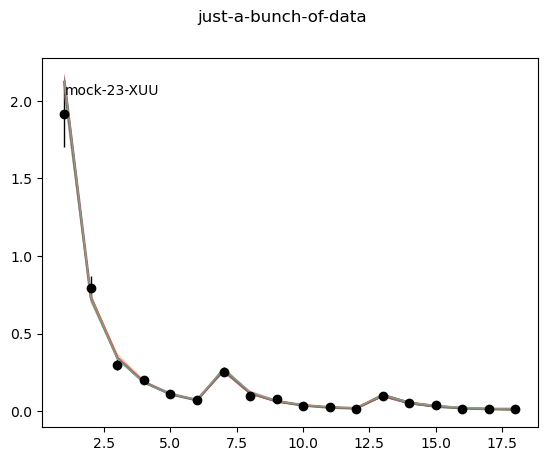

In [150]:
fig = gplots.jbod(points=mockset_XUU[:18], lines=[th], mesh=th)

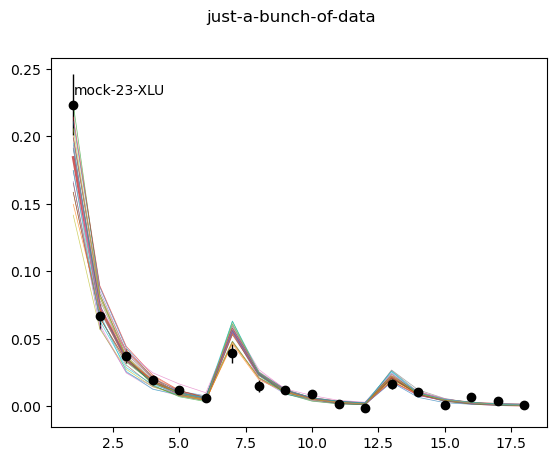

In [151]:
fig = gplots.jbod(points=mockset_XLU[:18], lines=[th], mesh=th)

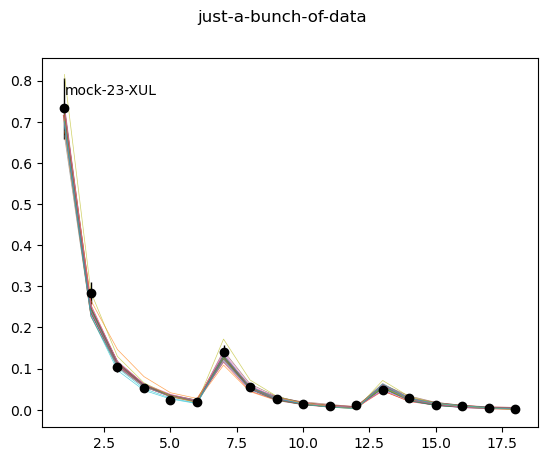

In [152]:
fig = gplots.jbod(points=mockset_XUL[:18], lines=[th], mesh=th)

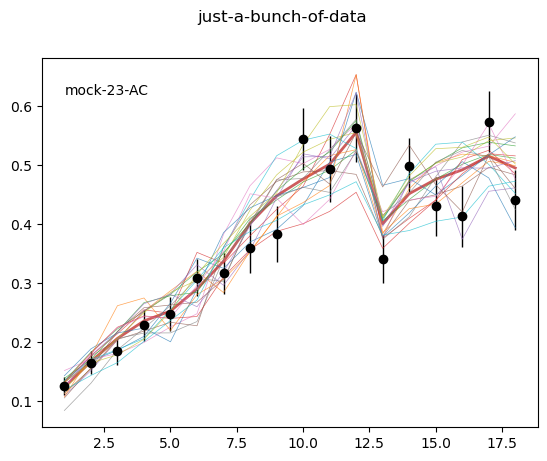

In [153]:
fig = gplots.jbod(points=mockset_AC[:18], lines=[th], mesh=th)

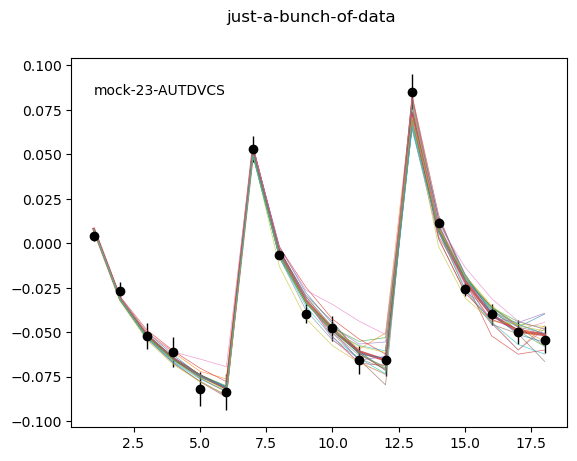

In [154]:
fig = gplots.jbod(points=mockset_AUTDVCS[:18], lines=[th], mesh=th)

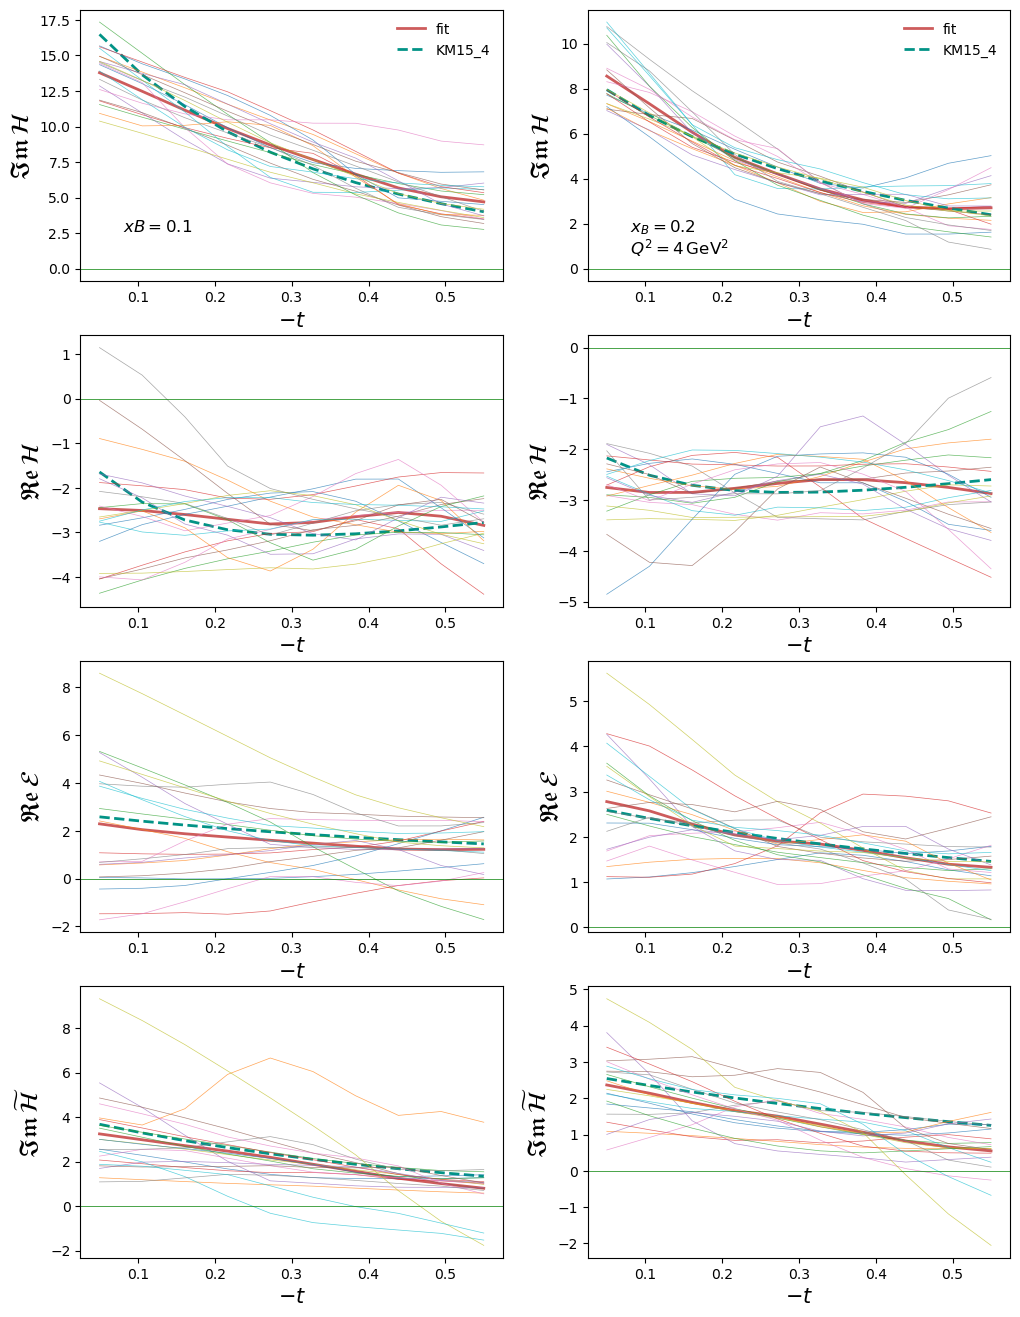

In [155]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[th, th_KM15_4], mesh=th)

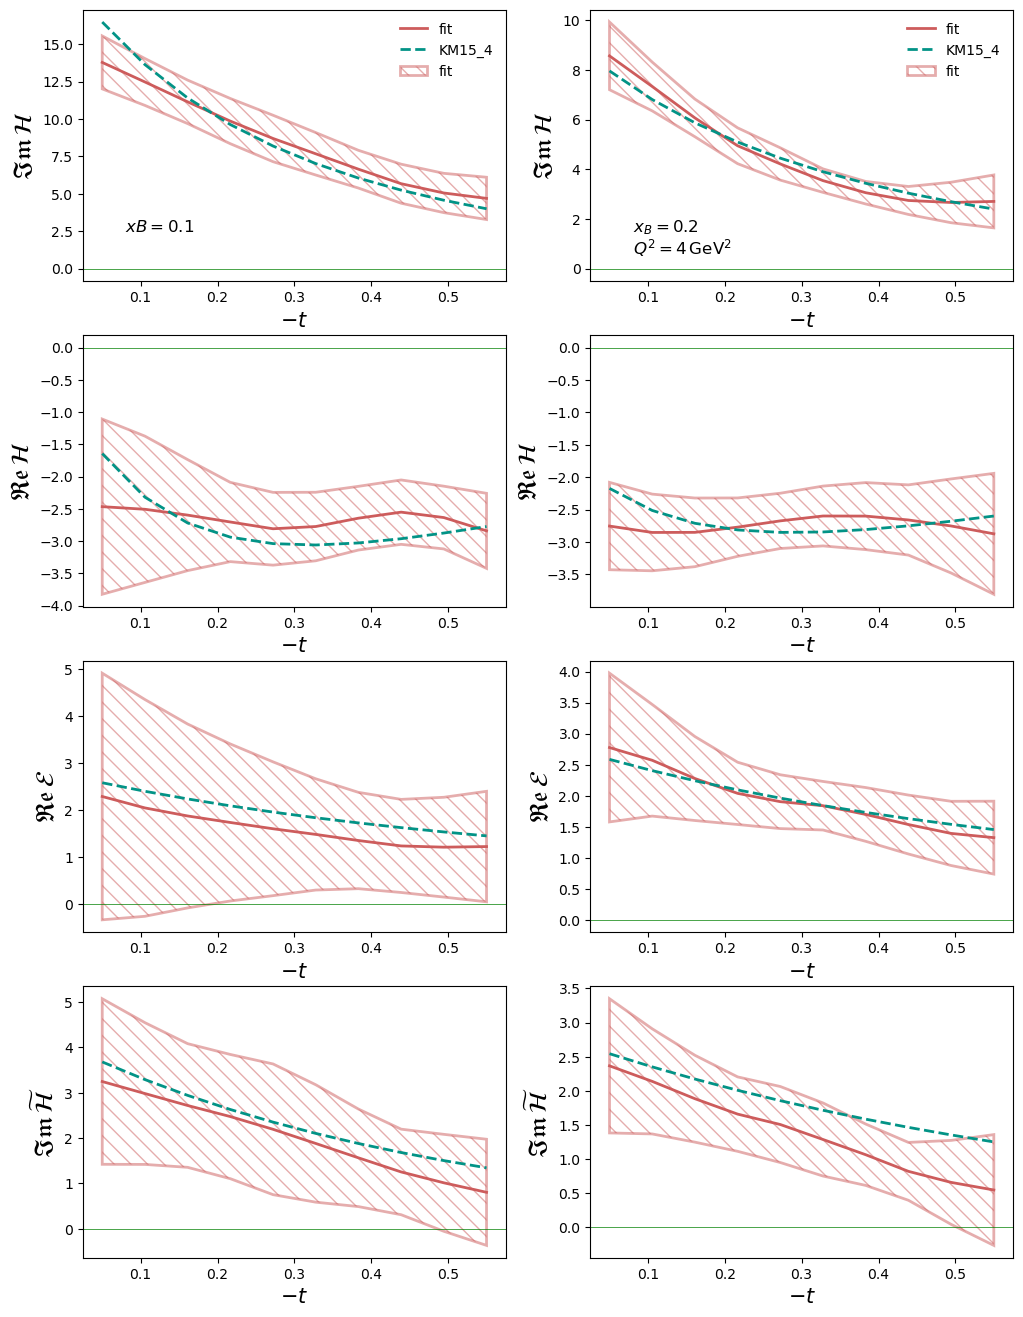

In [156]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[th, th_KM15_4], bands=[th])

# Simulation 9 - (XLU + XUU + ALU + AC + AUT,DVCS) - (ImH + ReH + ImE + ReE + ImHt) - (xB + t-dep)

## Dataset

In [95]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_5.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XLU = g.DataSet(mockset)

In [96]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XUU')
        pt.id = 4002
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_5.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUU = g.DataSet(mockset)

In [97]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      in2polarizationvector='L', in2polarization=+1,
                      observable='XUL')
        pt.id = 4003
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_5.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_XUL = g.DataSet(mockset)

In [98]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4004
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_5.predict(pt)
        pt.err = 0.1 * pt.val + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AC = g.DataSet(mockset)

In [99]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      in2polarizationvector='T', in2polarization=+1, varphi=torch.tensor(0.3),
                      observable='AUTDVCS')
        pt.id = 4005
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_5.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset_AUTDVCS = g.DataSet(mockset)

In [100]:
len(mockset_XLU),  len(mockset_XUU),  len(mockset_XUL),  len(mockset_AC),  len(mockset_AUTDVCS)

(24, 24, 24, 24, 24)

## Fit

In [101]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):

    def build_net(self):
            '''Overriding the default architecture and optimizer'''
            nn_model = torch.nn.Sequential(
                    torch.nn.Linear(2, 23),
                    torch.nn.ReLU(),
                    torch.nn.Linear(23, 37),
                    torch.nn.ReLU(),
                    torch.nn.Linear(37, 27),
                    torch.nn.ReLU(),
                    torch.nn.Linear(27, len(self.output_layer)),
                )
            optimizer = torch.optim.Rprop(nn_model.parameters(), lr=0.01)
            return nn_model, optimizer

In [102]:
th = NN(output_layer=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt'])
th.name = 'fit'

In [103]:
dirname = 'clos'
netfilename = 'cff5'
for k in range(1, 6):
    try:
        th.nets += torch.load('{}/{}-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets".format(len(th.nets)))

Loaded 0 nets


In [104]:
for net, mean, std in th.nets:
    net.eval()

In [105]:
f = g.fitter.NeuralFitter([mockset_XLU, mockset_XUU, mockset_XUL, mockset_AC, mockset_AUTDVCS],
                          th, nnets=3, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)

In [106]:
f.fit()


Epoch   2: train error = 35.3876 test error = 33.9596 -
Epoch   4: train error = 27.5133 test error = 23.2208 -
Epoch   6: train error = 12.7857 test error = 9.6111 -
Epoch   8: train error = 6.4099 test error = 6.6041 -
Epoch  10: train error = 4.4843 test error = 4.6794 -
Epoch  12: train error = 3.5877 test error = 3.2468 -
Epoch  14: train error = 2.8961 test error = 3.6947 +
Epoch  16: train error = 2.5933 test error = 2.8438 -
Epoch  18: train error = 2.4592 test error = 2.8396 -
Epoch  20: train error = 2.3486 test error = 2.5436 -
Epoch  22: train error = 2.2150 test error = 2.4464 -
Epoch  24: train error = 2.1005 test error = 2.3970 -
Epoch  26: train error = 2.0222 test error = 2.4592 +
Epoch  28: train error = 1.9568 test error = 2.4802 +
Epoch  30: train error = 1.8957 test error = 2.6290 +
Epoch  32: train error = 1.8343 test error = 2.7633 +
Epoch  34: train error = 1.7820 test error = 2.7887 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 2.3970208

In [107]:
print('chisq_XLU = {}'.format(th.chisq(mockset_XLU)))
print('chisq_XUU = {}'.format(th.chisq(mockset_XUL)))
print('chisq_XUL = {}'.format(th.chisq(mockset_XUL)))
print('chisq_AC = {}'.format(th.chisq(mockset_AC)))
print('chisq_AUTDVCS = {}'.format(th.chisq(mockset_AUTDVCS)))

chisq_XLU = (tensor(26.9137), 24, tensor(0.3085, dtype=torch.float64))
chisq_XUU = (tensor(19.5918), 24, tensor(0.7197, dtype=torch.float64))
chisq_XUL = (tensor(19.5918), 24, tensor(0.7197, dtype=torch.float64))
chisq_AC = (tensor(18.2949), 24, tensor(0.7885, dtype=torch.float64))
chisq_AUTDVCS = (tensor(22.6444), 24, tensor(0.5409, dtype=torch.float64))


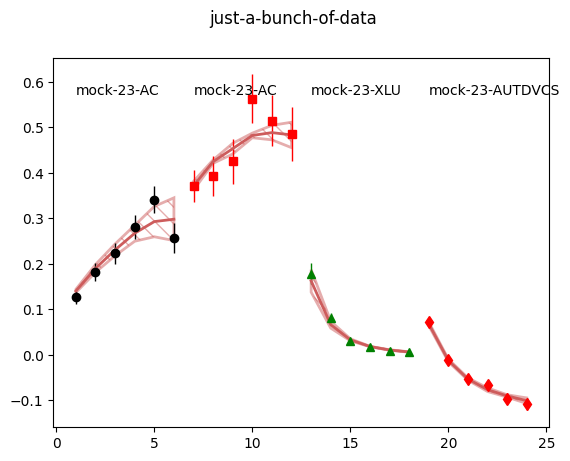

In [112]:
fig = gplots.jbod(points=[mockset_AC[:6], mockset_AC[6:12], mockset_XLU[:6], mockset_AUTDVCS[12:18]], lines=[th], bands=[th])

In [113]:
fig.savefig('{}/five-mesh.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

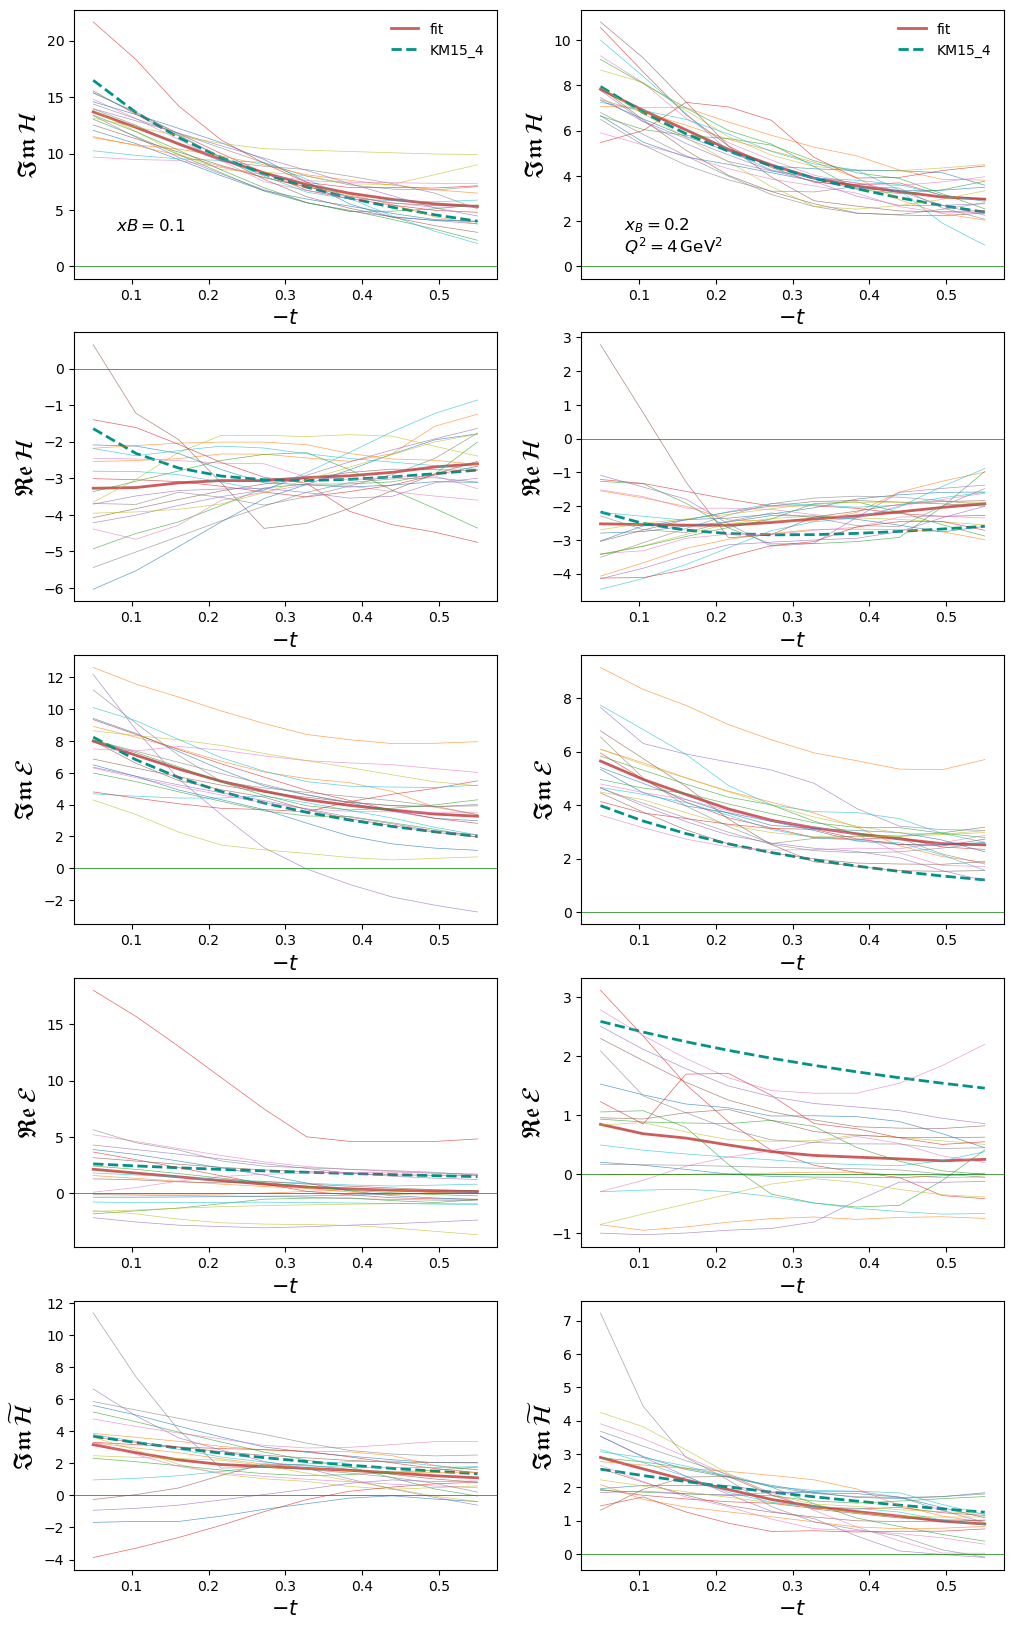

In [185]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt'], lines=[th, th_KM15_5], mesh=th)

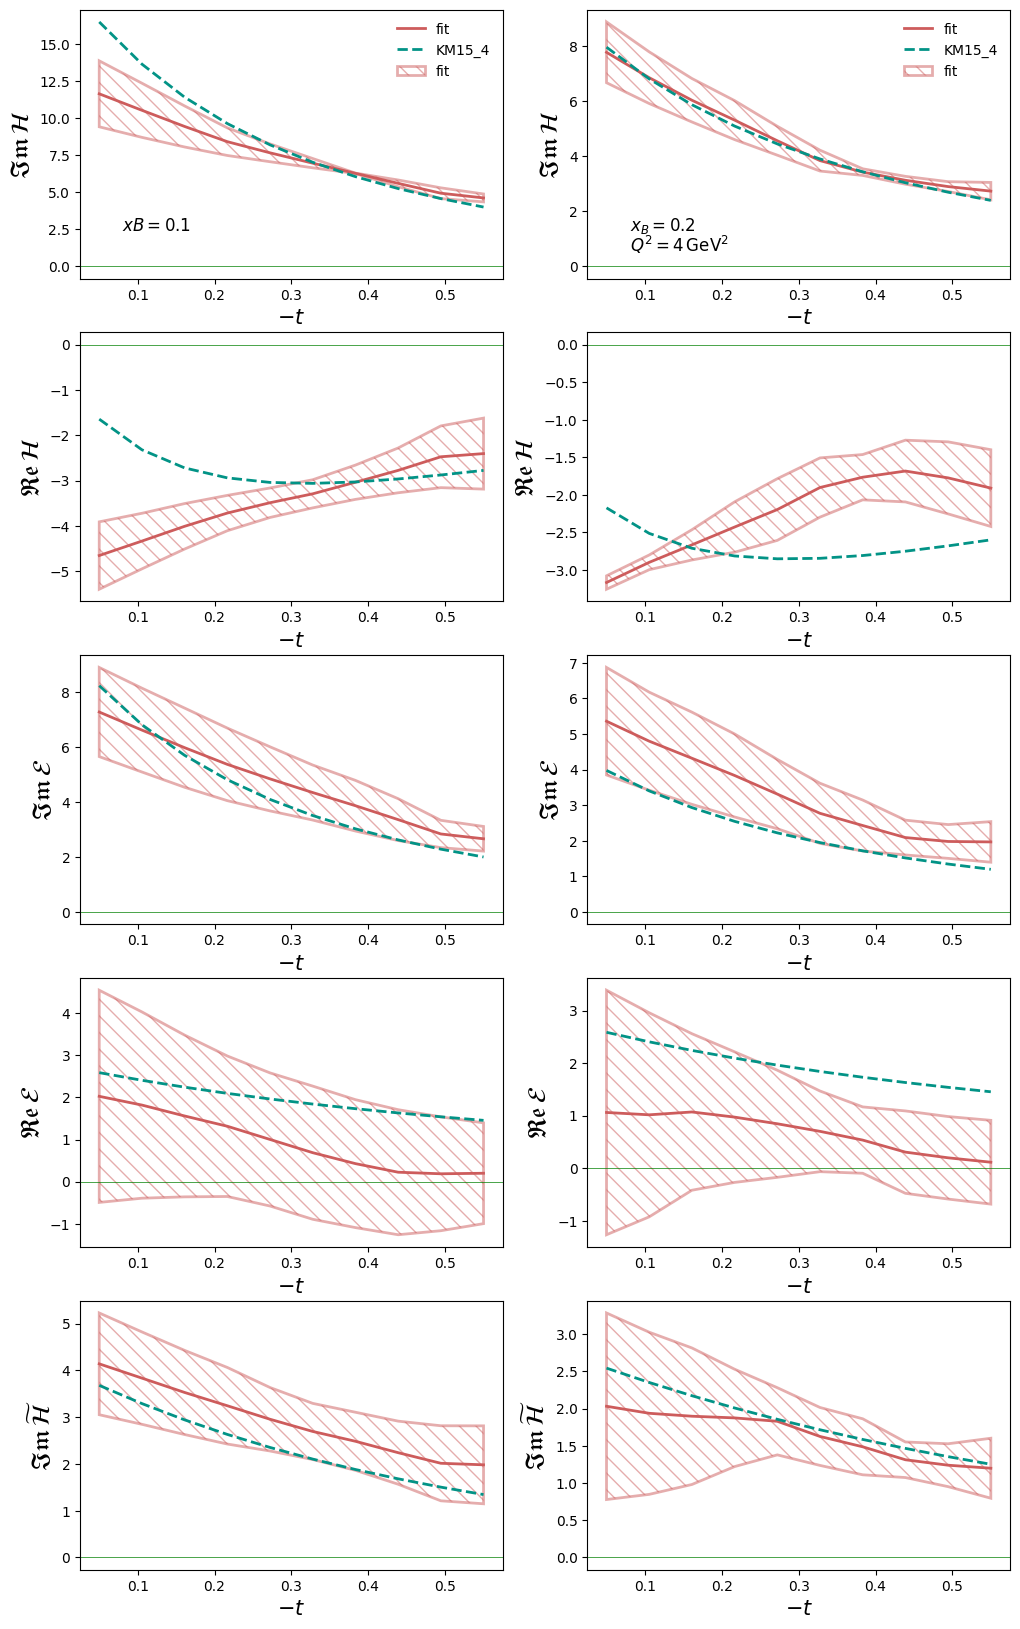

In [110]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt'], lines=[th, th_KM15_5], bands=[th])

In [111]:
fig.savefig('{}/five-tdep.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

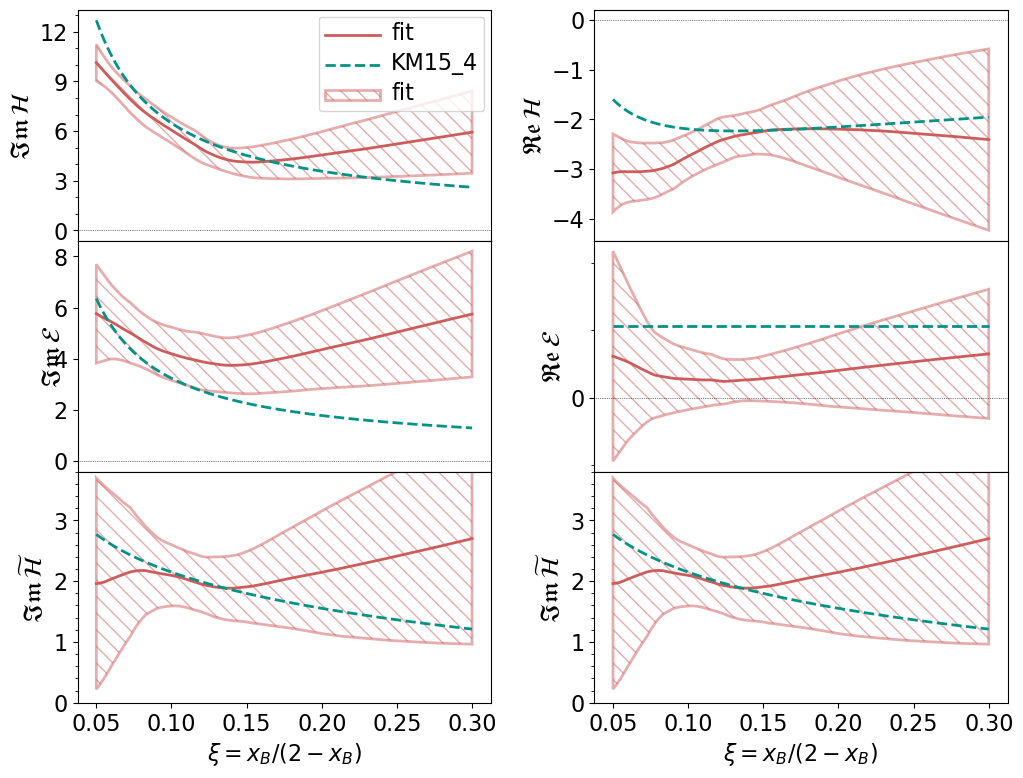

In [202]:
fig = gplots.CFF3(cffs=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt', 'ImHt'], lines=[th, th_KM15_5], bands=[th])

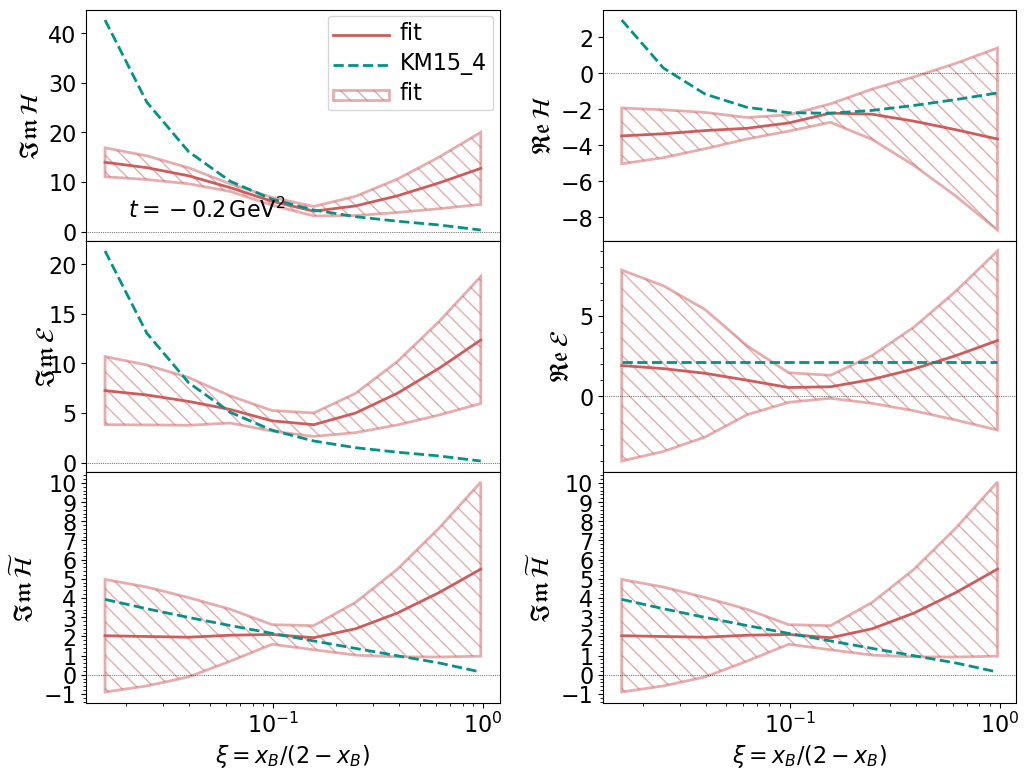

In [111]:
fig = gplots.CFF3log(cffs=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt', 'ImHt'], lines=[th, th_KM15_5], bands=[th])

In [112]:
fig.savefig('{}five-xdep.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

# Simulation 10 - investigating shrinking of uncertainties

In [138]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):
    pass

In [139]:
thold = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thold.name = 'old'
thnew = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thnew.name = 'new'

In [140]:
tholdL25 = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
tholdL25.name = 'old-L25'
thnewL25 = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thnewL25.name = 'new-L25'

In [96]:
tholdL1 = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
tholdL1.name = 'old-L1'
thnewL1 = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thnewL1.name = 'new-L1'

In [103]:
tholddo = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
tholddo.name = 'old-do'
thnewdo = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thnewdo.name = 'new-do'

In [53]:
tholdnr = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
tholdnr.name = 'old-nr'
thnewnr = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thnewnr.name = 'new-nr'

In [39]:
thold0 = NN(output_layer=['ImH', 'ReH', 'ReE', 'ImHt'])
thold0.name = 'old-0'

In [141]:
dirname = 'closure/nets'
netfilename = 'c4_L25'
for k in range(1, 5):
    try:
        tholdL25.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnewL25.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(tholdL25.nets), tholdL25.name))
print("Loaded {} nets for {}".format(len(thnewL25.nets), thnewL25.name))

Loaded 80 nets for old-L25
Loaded 80 nets for new-L25


In [142]:
for net, mean, std in tholdL25.nets:
    net.eval()
for net, mean, std in thnewL25.nets:
    net.eval()

In [99]:
dirname = 'closure/nets'
netfilename = 'c4_L1'
for k in range(1, 3):
    try:
        tholdL1.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnewL1.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(tholdL1.nets), tholdL1.name))
print("Loaded {} nets for {}".format(len(thnewL1.nets), thnewL1.name))

Loaded 40 nets for old-L1
Loaded 40 nets for new-L1


In [100]:
for net, mean, std in tholdL1.nets:
    net.eval()
for net, mean, std in thnewL1.nets:
    net.eval()

In [54]:
dirname = 'closure/nets'
netfilename = 'c4_nr'
for k in range(1, 3):
    try:
        tholdnr.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnewnr.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(tholdnr.nets), tholdnr.name))
print("Loaded {} nets for {}".format(len(thnewnr.nets), thnewnr.name))

Loaded 16 nets for old-nr
Loaded 16 nets for new-nr


In [143]:
dirname = 'closure/nets'
netfilename = 'c4'
for k in range(1, 3):
    try:
        thold.nets += torch.load('{}/{}_old-{}.tar'.format(dirname, netfilename, k))
        thnew.nets += torch.load('{}/{}_new-{}.tar'.format(dirname, netfilename, k))
    except:
        break
print("Loaded {} nets for {}".format(len(thold.nets), thold.name))
print("Loaded {} nets for {}".format(len(thnew.nets), thnew.name))

Loaded 80 nets for old
Loaded 80 nets for new


In [48]:
for dset in [mockset_XLU,  mockset_XUU,  mockset_XUL,  mockset_AC,  mockset_AUTDVCS]:
    for th in [thold0, tholdL2, thnewL2, th_KM15_4]:
        print(th.name, th.chisq(dset))

old-0 (tensor(81.2494), 24, tensor(3.8425e-08, dtype=torch.float64))
old-L2 (tensor(22.1810), 24, tensor(0.5685, dtype=torch.float64))
new-L2 (tensor(23.2635), 24, tensor(0.5043, dtype=torch.float64))
KM15_4 tensor(25.8753)
old-0 (tensor(56.4756), 24, tensor(0.0002, dtype=torch.float64))
old-L2 (tensor(31.1872), 24, tensor(0.1485, dtype=torch.float64))
new-L2 (tensor(26.0772), 24, tensor(0.3493, dtype=torch.float64))
KM15_4 tensor(27.3201)
old-0 (tensor(79.4839), 24, tensor(7.3509e-08, dtype=torch.float64))
old-L2 (tensor(26.3932), 24, tensor(0.3335, dtype=torch.float64))
new-L2 (tensor(26.9757), 24, tensor(0.3056, dtype=torch.float64))
KM15_4 tensor(24.7350)
old-0 (tensor(52.2452), 24, tensor(0.0007, dtype=torch.float64))
old-L2 (tensor(28.9329), 24, tensor(0.2227, dtype=torch.float64))
new-L2 (tensor(24.1570), 24, tensor(0.4527, dtype=torch.float64))
KM15_4 tensor(22.6892)
old-0 (tensor(56.6484), 24, tensor(0.0002, dtype=torch.float64))
old-L2 (tensor(17.5866), 24, tensor(0.8226, dty

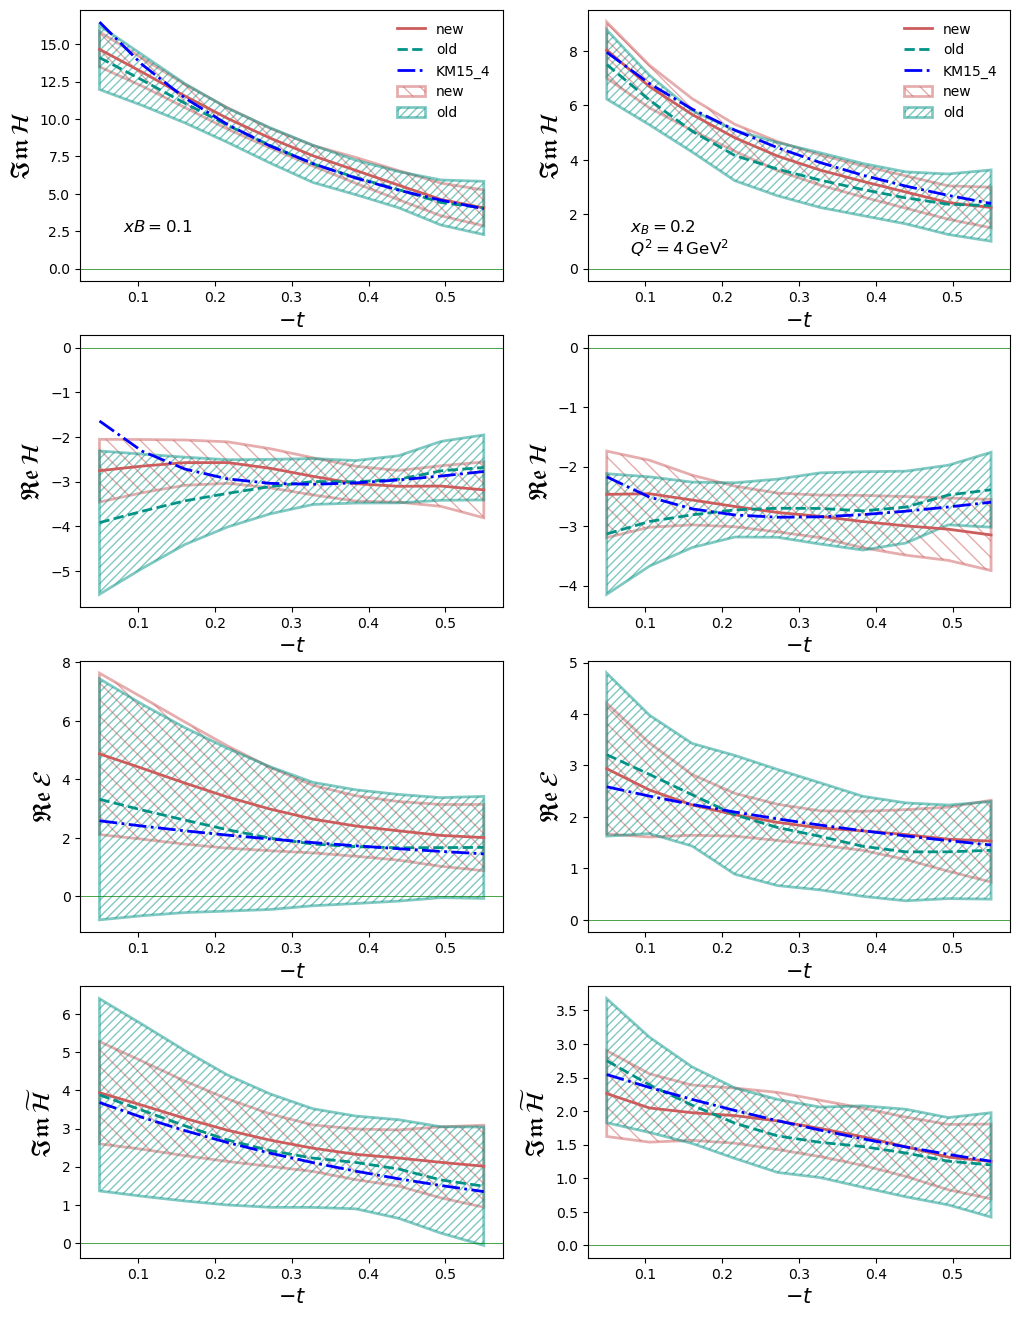

In [144]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[thnew, thold, th_KM15_4],
                  bands=[thnew, thold])

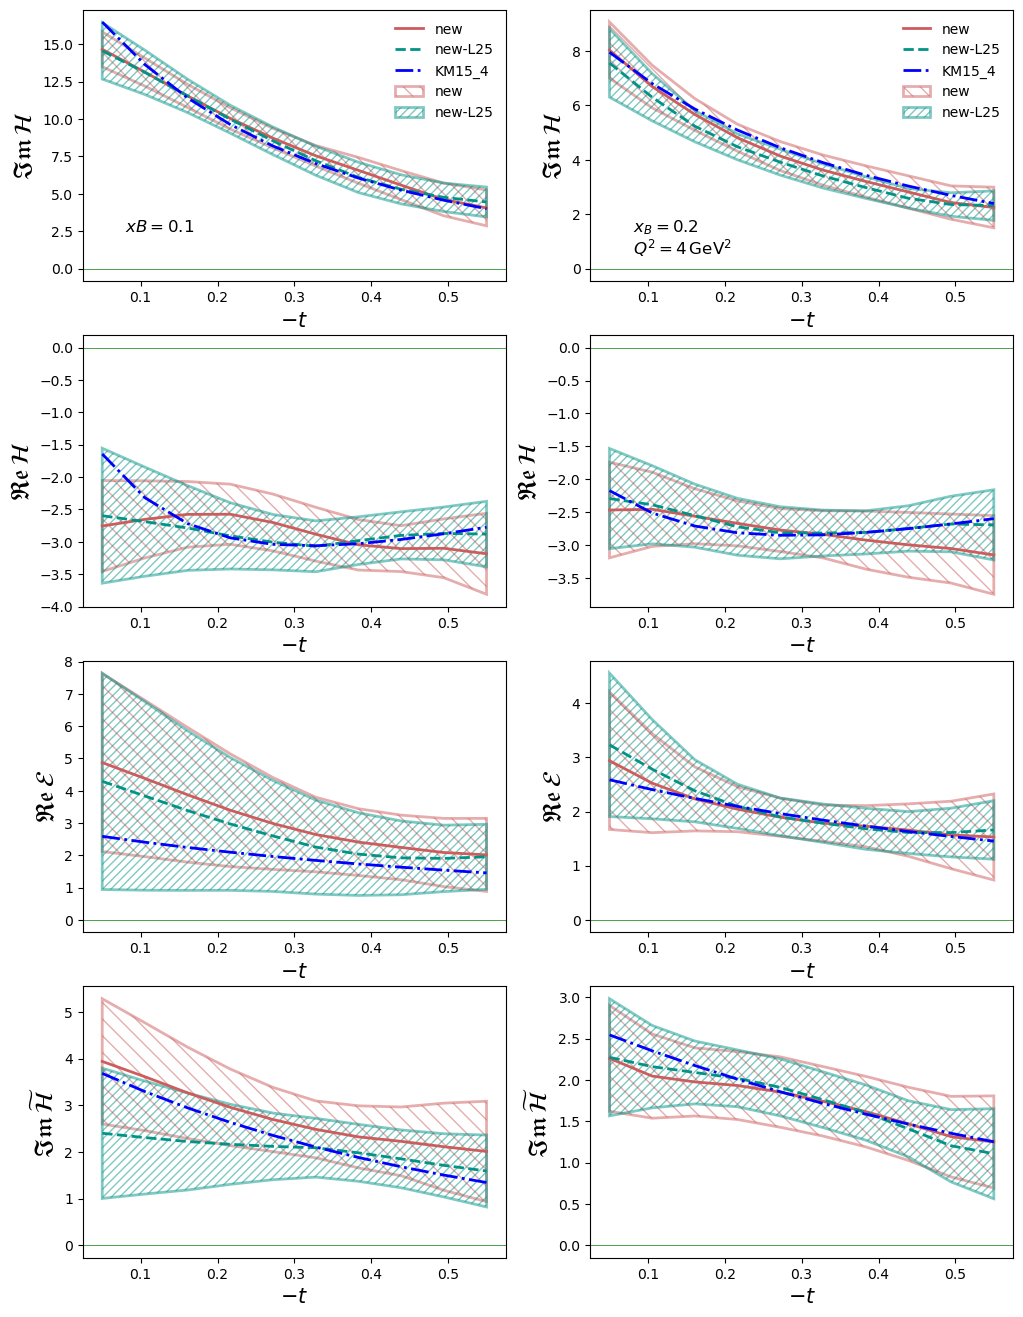

In [145]:
fig = gplots.CFFt(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[thnew, thnewL25, th_KM15_4],
                  bands=[thnew, thnewL25])

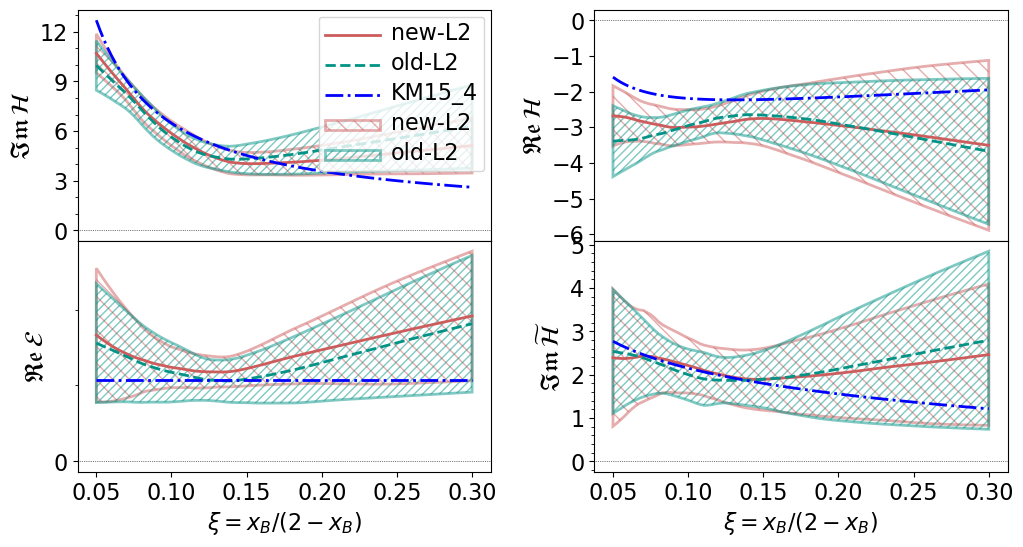

In [80]:
fig = gplots.CFF3(cffs=['ImH', 'ReH', 'ReE', 'ImHt'], lines=[thnewL2, tholdL2, th_KM15_4],
                  bands=[thnewL2, tholdL2])